In [2]:
import xarray as xr
import dask.array
import numpy as np
import pandas as pd
import os
import scipy.io
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import sys
sys.path.append('/home/Ruth.Moorman/OM4p25_JRA55-do_simulations')
### import required python functions
from om4_tools import *
# from ssh_contours import *
## plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as pcm
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as col
import cmocean.cm as cm
from matplotlib import rc, rcParams
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import sys
sys.path.append('/home/Ruth.Moorman/')
import nclcmaps
import cv2

In [3]:
rcParams["contour.negative_linestyle"] = 'solid'

In [4]:
rc('xtick', labelsize=30) 
rc('ytick', labelsize=30) 
rc('axes', labelsize=30)

In [5]:
# start with mapping the bathymetry
# only interested in the Southern Ocean south of 29S generally
expdir = '/archive/Ruth.Moorman/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/'
lat_north = -29
static = xr.open_dataset(expdir+'/cycle1/ocean_static/20170101.ocean_static.nc')
bathy = static.deptho.sel(yh = slice(-90,lat_north))
land_mask = static.wet.sel(yh = slice(-90,lat_north))

In [6]:
def so_basics(ax, land_mask=land_mask, lat_north = -29, grid = True):
    ax.contour(land_mask.sel(yh = slice(-90,lat_north)).xh, land_mask.sel(yh = slice(-90,lat_north)).yh,land_mask.sel(yh = slice(-90,lat_north)),[0,1], colors = 'k', alpha = 1, transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, lat_north], ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--', alpha = 0.7)
        gl.ylocator = mticker.FixedLocator([-90,-80,-70, -60, -50, -40, -30])

In [ ]:
ssh_annual_C1 = get_iaf_variable(expdir,1, 'ocean_annual', 'zos')
ssh_annual_C2 = get_iaf_variable(expdir,2, 'ocean_annual', 'zos')
ssh_annual_C3 = get_iaf_variable(expdir,3, 'ocean_annual', 'zos')

In [ ]:
ssh_annual_C1 = ssh_annual_C1.load()
ssh_mean_C1 = ssh_annual_C1.mean(dim = 'time').load()

# OM4p25-BLING

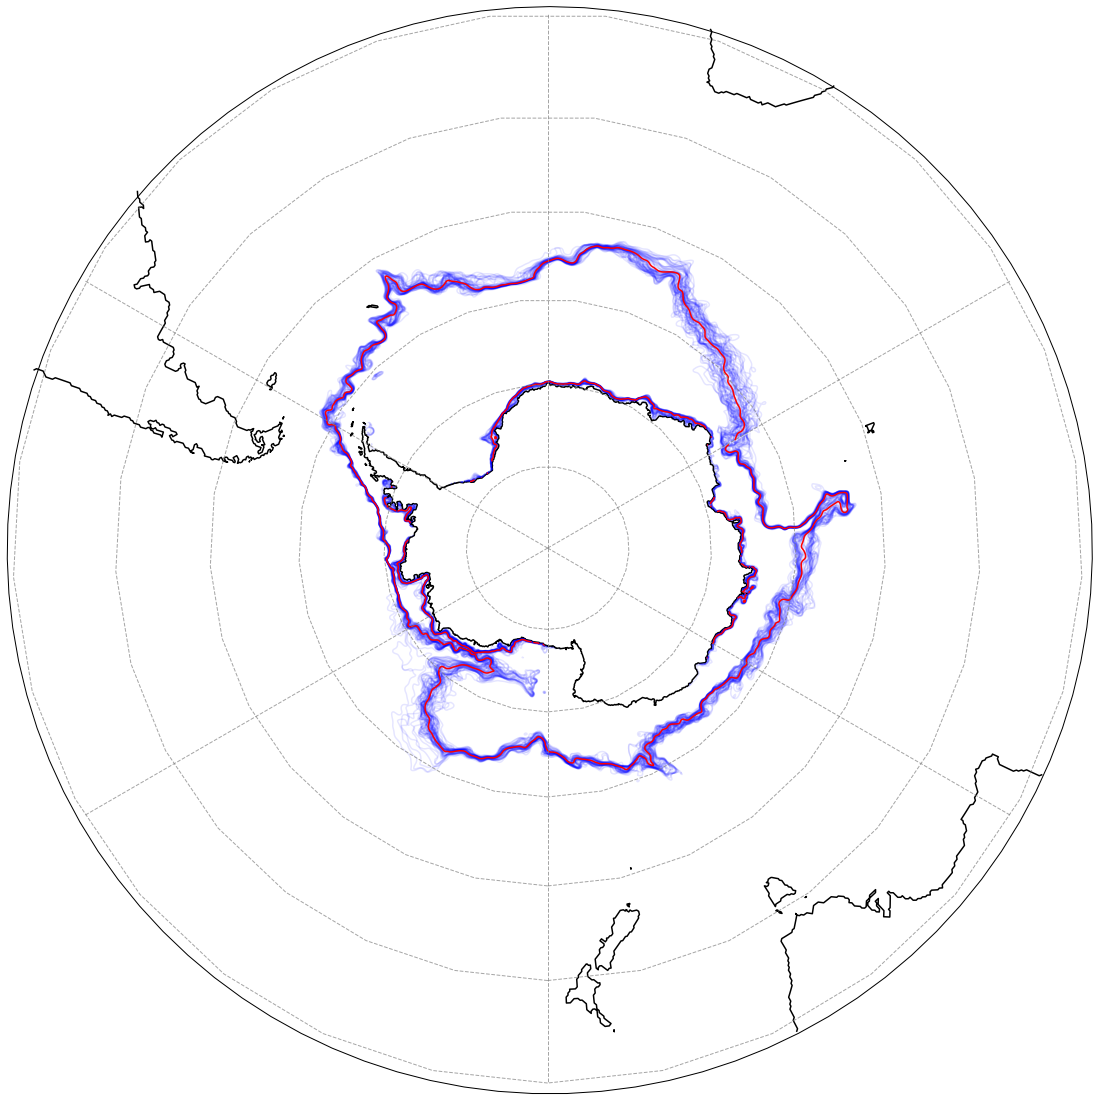

In [8]:
fig = plt.figure(figsize=[20, 20])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -29
so_basics(ax,land_mask,lat_north = -29)

ax.contour(ssh_annual_C1.isel(time = 0).xh, ssh_annual_C1.isel(time = 0).yh,ssh_annual_C1.isel(time = 0), levels = np.array([-1.561]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1958
ax.contour(ssh_annual_C1.isel(time = 1).xh, ssh_annual_C1.isel(time = 1).yh,ssh_annual_C1.isel(time = 1), levels = np.array([-1.568]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1959
ax.contour(ssh_annual_C1.isel(time = 2).xh, ssh_annual_C1.isel(time = 2).yh,ssh_annual_C1.isel(time = 2), levels = np.array([-1.563]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1960
ax.contour(ssh_annual_C1.isel(time = 3).xh, ssh_annual_C1.isel(time = 3).yh,ssh_annual_C1.isel(time = 3), levels = np.array([-1.553]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1961
ax.contour(ssh_annual_C1.isel(time = 4).xh, ssh_annual_C1.isel(time = 4).yh,ssh_annual_C1.isel(time = 4), levels = np.array([-1.57]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1962
ax.contour(ssh_annual_C1.isel(time = 5).xh, ssh_annual_C1.isel(time = 5).yh,ssh_annual_C1.isel(time = 5), levels = np.array([-1.574]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1963
ax.contour(ssh_annual_C1.isel(time = 6).xh, ssh_annual_C1.isel(time = 6).yh,ssh_annual_C1.isel(time = 6), levels = np.array([-1.55]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1964
ax.contour(ssh_annual_C1.isel(time = 7).xh, ssh_annual_C1.isel(time = 7).yh,ssh_annual_C1.isel(time = 7), levels = np.array([-1.549]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1965
ax.contour(ssh_annual_C1.isel(time = 8).xh, ssh_annual_C1.isel(time = 8).yh,ssh_annual_C1.isel(time = 8), levels = np.array([-1.543]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1966
ax.contour(ssh_annual_C1.isel(time = 9).xh, ssh_annual_C1.isel(time = 9).yh,ssh_annual_C1.isel(time = 9), levels = np.array([-1.527]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1967
ax.contour(ssh_annual_C1.isel(time = 10).xh, ssh_annual_C1.isel(time = 10).yh,ssh_annual_C1.isel(time = 10), levels = np.array([-1.541]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1968
ax.contour(ssh_annual_C1.isel(time = 11).xh, ssh_annual_C1.isel(time = 11).yh,ssh_annual_C1.isel(time = 11), levels = np.array([-1.536]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1969
ax.contour(ssh_annual_C1.isel(time = 12).xh, ssh_annual_C1.isel(time = 12).yh,ssh_annual_C1.isel(time = 12), levels = np.array([-1.522]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1970
ax.contour(ssh_annual_C1.isel(time = 13).xh, ssh_annual_C1.isel(time = 13).yh,ssh_annual_C1.isel(time = 13), levels = np.array([-1.524]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1971
ax.contour(ssh_annual_C1.isel(time = 14).xh, ssh_annual_C1.isel(time = 14).yh,ssh_annual_C1.isel(time = 14), levels = np.array([-1.521]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1972
ax.contour(ssh_annual_C1.isel(time = 15).xh, ssh_annual_C1.isel(time = 15).yh,ssh_annual_C1.isel(time = 15), levels = np.array([-1.533]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1973
ax.contour(ssh_annual_C1.isel(time = 16).xh, ssh_annual_C1.isel(time = 16).yh,ssh_annual_C1.isel(time = 16), levels = np.array([-1.531]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1974
ax.contour(ssh_annual_C1.isel(time = 17).xh, ssh_annual_C1.isel(time = 17).yh,ssh_annual_C1.isel(time = 17), levels = np.array([-1.544]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1975
ax.contour(ssh_annual_C1.isel(time = 18).xh, ssh_annual_C1.isel(time = 18).yh,ssh_annual_C1.isel(time = 18), levels = np.array([-1.569]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1976
ax.contour(ssh_annual_C1.isel(time = 19).xh, ssh_annual_C1.isel(time = 19).yh,ssh_annual_C1.isel(time = 19), levels = np.array([-1.581]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1977
ax.contour(ssh_annual_C1.isel(time = 20).xh, ssh_annual_C1.isel(time = 20).yh,ssh_annual_C1.isel(time = 20), levels = np.array([-1.572]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1978
ax.contour(ssh_annual_C1.isel(time = 21).xh, ssh_annual_C1.isel(time = 21).yh,ssh_annual_C1.isel(time = 21), levels = np.array([-1.58]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1979
ax.contour(ssh_annual_C1.isel(time = 22).xh, ssh_annual_C1.isel(time = 22).yh,ssh_annual_C1.isel(time = 22), levels = np.array([-1.582]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1980
ax.contour(ssh_annual_C1.isel(time = 23).xh, ssh_annual_C1.isel(time = 23).yh,ssh_annual_C1.isel(time = 23), levels = np.array([-1.581]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1981
ax.contour(ssh_annual_C1.isel(time = 24).xh, ssh_annual_C1.isel(time = 24).yh,ssh_annual_C1.isel(time = 24), levels = np.array([-1.591]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1982
ax.contour(ssh_annual_C1.isel(time = 25).xh, ssh_annual_C1.isel(time = 25).yh,ssh_annual_C1.isel(time = 25), levels = np.array([-1.556]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1983
ax.contour(ssh_annual_C1.isel(time = 26).xh, ssh_annual_C1.isel(time = 26).yh,ssh_annual_C1.isel(time = 26), levels = np.array([-1.572]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1984
ax.contour(ssh_annual_C1.isel(time = 27).xh, ssh_annual_C1.isel(time = 27).yh,ssh_annual_C1.isel(time = 27), levels = np.array([-1.57]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1985
ax.contour(ssh_annual_C1.isel(time = 28).xh, ssh_annual_C1.isel(time = 28).yh,ssh_annual_C1.isel(time = 28), levels = np.array([-1.579]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1986
ax.contour(ssh_annual_C1.isel(time = 29).xh, ssh_annual_C1.isel(time = 29).yh,ssh_annual_C1.isel(time = 29), levels = np.array([-1.582]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1987
ax.contour(ssh_annual_C1.isel(time = 30).xh, ssh_annual_C1.isel(time = 30).yh,ssh_annual_C1.isel(time = 30), levels = np.array([-1.577]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1988
ax.contour(ssh_annual_C1.isel(time = 31).xh, ssh_annual_C1.isel(time = 31).yh,ssh_annual_C1.isel(time = 31), levels = np.array([-1.583]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1989
ax.contour(ssh_annual_C1.isel(time = 32).xh, ssh_annual_C1.isel(time = 32).yh,ssh_annual_C1.isel(time = 32), levels = np.array([-1.585]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1990
ax.contour(ssh_annual_C1.isel(time = 33).xh, ssh_annual_C1.isel(time = 33).yh,ssh_annual_C1.isel(time = 33), levels = np.array([-1.589]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1991
ax.contour(ssh_annual_C1.isel(time = 34).xh, ssh_annual_C1.isel(time = 34).yh,ssh_annual_C1.isel(time = 34), levels = np.array([-1.586]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1992
# start of satellite period
ax.contour(ssh_annual_C1.isel(time = 35).xh, ssh_annual_C1.isel(time = 35).yh,ssh_annual_C1.isel(time = 35), levels = np.array([-1.606]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1993
ax.contour(ssh_annual_C1.isel(time = 36).xh, ssh_annual_C1.isel(time = 36).yh,ssh_annual_C1.isel(time = 36), levels = np.array([-1.603]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1994
ax.contour(ssh_annual_C1.isel(time = 37).xh, ssh_annual_C1.isel(time = 37).yh,ssh_annual_C1.isel(time = 37), levels = np.array([-1.601]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1995
ax.contour(ssh_annual_C1.isel(time = 38).xh, ssh_annual_C1.isel(time = 38).yh,ssh_annual_C1.isel(time = 38), levels = np.array([-1.595]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1996
ax.contour(ssh_annual_C1.isel(time = 39).xh, ssh_annual_C1.isel(time = 39).yh,ssh_annual_C1.isel(time = 39), levels = np.array([-1.601]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1997
ax.contour(ssh_annual_C1.isel(time = 40).xh, ssh_annual_C1.isel(time = 40).yh,ssh_annual_C1.isel(time = 40), levels = np.array([-1.60]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1998
ax.contour(ssh_annual_C1.isel(time = 41).xh, ssh_annual_C1.isel(time = 41).yh,ssh_annual_C1.isel(time = 41), levels = np.array([-1.611]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 1999
ax.contour(ssh_annual_C1.isel(time = 42).xh, ssh_annual_C1.isel(time = 42).yh,ssh_annual_C1.isel(time = 42), levels = np.array([-1.599]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2000
ax.contour(ssh_annual_C1.isel(time = 43).xh, ssh_annual_C1.isel(time = 43).yh,ssh_annual_C1.isel(time = 43), levels = np.array([-1.611]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2001
ax.contour(ssh_annual_C1.isel(time = 44).xh, ssh_annual_C1.isel(time = 44).yh,ssh_annual_C1.isel(time = 44), levels = np.array([-1.618]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2002
ax.contour(ssh_annual_C1.isel(time = 45).xh, ssh_annual_C1.isel(time = 45).yh,ssh_annual_C1.isel(time = 45), levels = np.array([-1.607]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2003
ax.contour(ssh_annual_C1.isel(time = 46).xh, ssh_annual_C1.isel(time = 46).yh,ssh_annual_C1.isel(time = 46), levels = np.array([-1.614]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2004
ax.contour(ssh_annual_C1.isel(time = 47).xh, ssh_annual_C1.isel(time = 47).yh,ssh_annual_C1.isel(time = 47), levels = np.array([-1.613]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2005
ax.contour(ssh_annual_C1.isel(time = 48).xh, ssh_annual_C1.isel(time = 48).yh,ssh_annual_C1.isel(time = 48), levels = np.array([-1.602]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2006
ax.contour(ssh_annual_C1.isel(time = 49).xh, ssh_annual_C1.isel(time = 49).yh,ssh_annual_C1.isel(time = 49), levels = np.array([-1.605]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2007
ax.contour(ssh_annual_C1.isel(time = 50).xh, ssh_annual_C1.isel(time = 50).yh,ssh_annual_C1.isel(time = 50), levels = np.array([-1.607]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2008
ax.contour(ssh_annual_C1.isel(time = 51).xh, ssh_annual_C1.isel(time = 51).yh,ssh_annual_C1.isel(time = 51), levels = np.array([-1.605]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2009
ax.contour(ssh_annual_C1.isel(time = 52).xh, ssh_annual_C1.isel(time = 52).yh,ssh_annual_C1.isel(time = 52), levels = np.array([-1.605]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2010
ax.contour(ssh_annual_C1.isel(time = 53).xh, ssh_annual_C1.isel(time = 53).yh,ssh_annual_C1.isel(time = 53), levels = np.array([-1.595]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2011
ax.contour(ssh_annual_C1.isel(time = 54).xh, ssh_annual_C1.isel(time = 54).yh,ssh_annual_C1.isel(time = 54), levels = np.array([-1.602]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2012
ax.contour(ssh_annual_C1.isel(time = 55).xh, ssh_annual_C1.isel(time = 55).yh,ssh_annual_C1.isel(time = 55), levels = np.array([-1.609]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2013
ax.contour(ssh_annual_C1.isel(time = 56).xh, ssh_annual_C1.isel(time = 56).yh,ssh_annual_C1.isel(time = 56), levels = np.array([-1.614]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2014
ax.contour(ssh_annual_C1.isel(time = 57).xh, ssh_annual_C1.isel(time = 57).yh,ssh_annual_C1.isel(time = 57), levels = np.array([-1.625]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2015
ax.contour(ssh_annual_C1.isel(time = 58).xh, ssh_annual_C1.isel(time = 58).yh,ssh_annual_C1.isel(time = 58), levels = np.array([-1.638]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2016
ax.contour(ssh_annual_C1.isel(time = 59).xh, ssh_annual_C1.isel(time = 59).yh,ssh_annual_C1.isel(time = 59), levels = np.array([-1.64]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) # 2017

c = ax.contour(ssh_mean_C1.xh, ssh_mean_C1.yh,ssh_mean_C1, levels = np.array([-1.585]), colors = 'r',alpha = 1,transform = ccrs.PlateCarree())

plt.show()

In [9]:
ssh_annual_C2 = ssh_annual_C2.load()
ssh_mean_C2 = ssh_annual_C2.mean(dim = 'time').load()

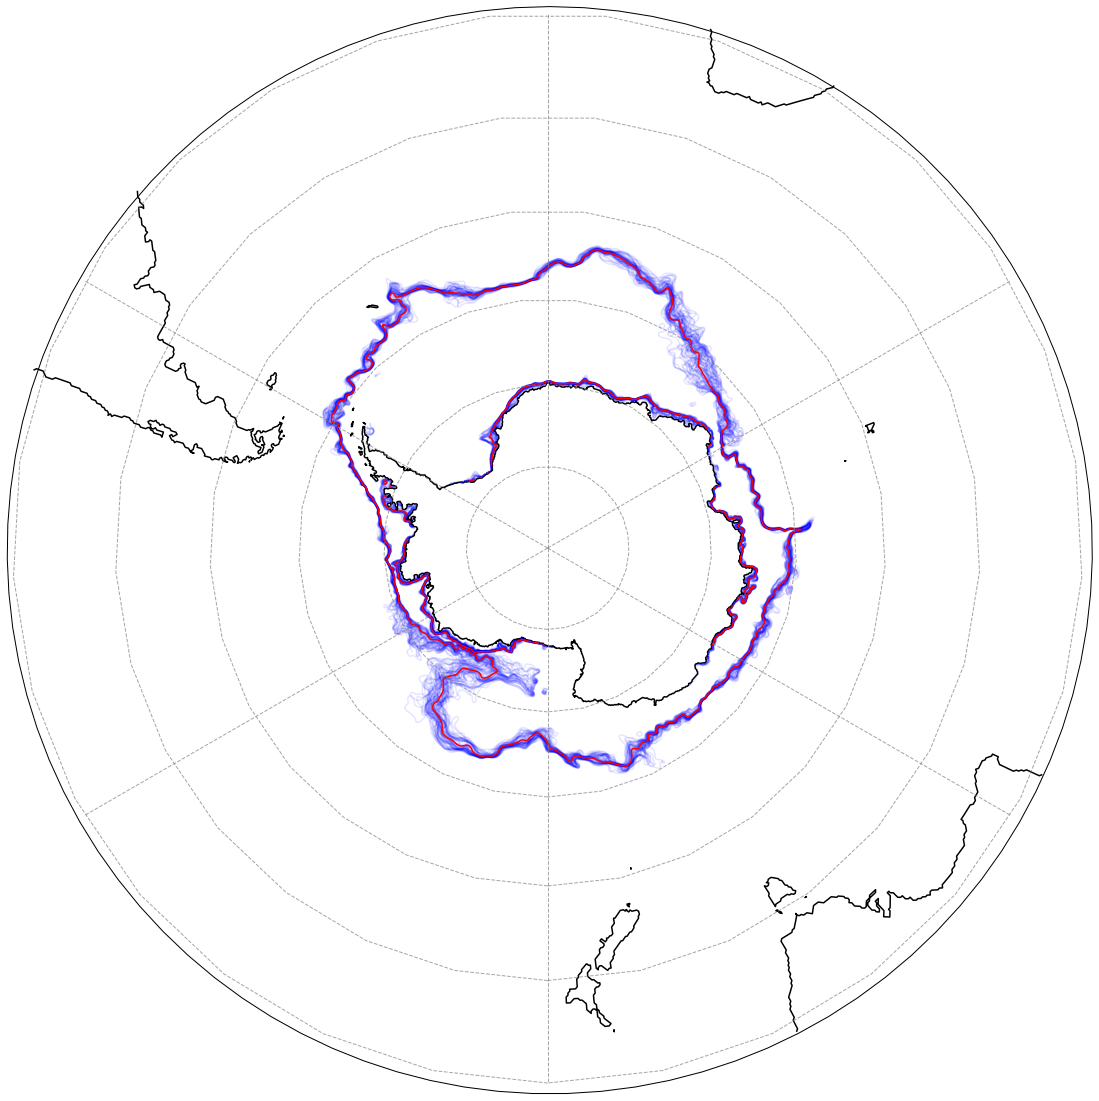

In [10]:
fig = plt.figure(figsize=[20, 20])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -29
so_basics(ax,land_mask,lat_north = -29)
ax.contour(ssh_annual_C2.isel(time = 0).xh, ssh_annual_C2.isel(time = 0).yh,ssh_annual_C2.isel(time = 0), levels = np.array([-1.610]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 1).xh, ssh_annual_C2.isel(time = 1).yh,ssh_annual_C2.isel(time = 1), levels = np.array([-1.622]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 2).xh, ssh_annual_C2.isel(time = 2).yh,ssh_annual_C2.isel(time = 2), levels = np.array([-1.617]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 3).xh, ssh_annual_C2.isel(time = 3).yh,ssh_annual_C2.isel(time = 3), levels = np.array([-1.599]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 4).xh, ssh_annual_C2.isel(time = 4).yh,ssh_annual_C2.isel(time = 4), levels = np.array([-1.611]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 5).xh, ssh_annual_C2.isel(time = 5).yh,ssh_annual_C2.isel(time = 5), levels = np.array([-1.628]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 6).xh, ssh_annual_C2.isel(time = 6).yh,ssh_annual_C2.isel(time = 6), levels = np.array([-1.617]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 7).xh, ssh_annual_C2.isel(time = 7).yh,ssh_annual_C2.isel(time = 7), levels = np.array([-1.609]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 8).xh, ssh_annual_C2.isel(time = 8).yh,ssh_annual_C2.isel(time = 8), levels = np.array([-1.614]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 9).xh, ssh_annual_C2.isel(time = 9).yh,ssh_annual_C2.isel(time = 9), levels = np.array([-1.596]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 10).xh, ssh_annual_C2.isel(time = 10).yh,ssh_annual_C2.isel(time = 10), levels = np.array([-1.625]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 11).xh, ssh_annual_C2.isel(time = 11).yh,ssh_annual_C2.isel(time = 11), levels = np.array([-1.614]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 12).xh, ssh_annual_C2.isel(time = 12).yh,ssh_annual_C2.isel(time = 12), levels = np.array([-1.618]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 13).xh, ssh_annual_C2.isel(time = 13).yh,ssh_annual_C2.isel(time = 13), levels = np.array([-1.613]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 14).xh, ssh_annual_C2.isel(time = 14).yh,ssh_annual_C2.isel(time = 14), levels = np.array([-1.616]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 15).xh, ssh_annual_C2.isel(time = 15).yh,ssh_annual_C2.isel(time = 15), levels = np.array([-1.63]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 16).xh, ssh_annual_C2.isel(time = 16).yh,ssh_annual_C2.isel(time = 16), levels = np.array([-1.625]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 17).xh, ssh_annual_C2.isel(time = 17).yh,ssh_annual_C2.isel(time = 17), levels = np.array([-1.638]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 18).xh, ssh_annual_C2.isel(time = 18).yh,ssh_annual_C2.isel(time = 18), levels = np.array([-1.662]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 19).xh, ssh_annual_C2.isel(time = 19).yh,ssh_annual_C2.isel(time = 19), levels = np.array([-1.654]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 20).xh, ssh_annual_C2.isel(time = 20).yh,ssh_annual_C2.isel(time = 20), levels = np.array([-1.657]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 21).xh, ssh_annual_C2.isel(time = 21).yh,ssh_annual_C2.isel(time = 21), levels = np.array([-1.654]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 22).xh, ssh_annual_C2.isel(time = 22).yh,ssh_annual_C2.isel(time = 22), levels = np.array([-1.644]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 23).xh, ssh_annual_C2.isel(time = 23).yh,ssh_annual_C2.isel(time = 23), levels = np.array([-1.651]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 24).xh, ssh_annual_C2.isel(time = 24).yh,ssh_annual_C2.isel(time = 24), levels = np.array([-1.655]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 25).xh, ssh_annual_C2.isel(time = 25).yh,ssh_annual_C2.isel(time = 25), levels = np.array([-1.636]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 26).xh, ssh_annual_C2.isel(time = 26).yh,ssh_annual_C2.isel(time = 26), levels = np.array([-1.631]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 27).xh, ssh_annual_C2.isel(time = 27).yh,ssh_annual_C2.isel(time = 27), levels = np.array([-1.637]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 28).xh, ssh_annual_C2.isel(time = 28).yh,ssh_annual_C2.isel(time = 28), levels = np.array([-1.639]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 29).xh, ssh_annual_C2.isel(time = 29).yh,ssh_annual_C2.isel(time = 29), levels = np.array([-1.640]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 30).xh, ssh_annual_C2.isel(time = 30).yh,ssh_annual_C2.isel(time = 30), levels = np.array([-1.624]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 31).xh, ssh_annual_C2.isel(time = 31).yh,ssh_annual_C2.isel(time = 31), levels = np.array([-1.645]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 32).xh, ssh_annual_C2.isel(time = 32).yh,ssh_annual_C2.isel(time = 32), levels = np.array([-1.639]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 33).xh, ssh_annual_C2.isel(time = 33).yh,ssh_annual_C2.isel(time = 33), levels = np.array([-1.63]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 34).xh, ssh_annual_C2.isel(time = 34).yh,ssh_annual_C2.isel(time = 34), levels = np.array([-1.626]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
# start of satellite period
ax.contour(ssh_annual_C2.isel(time = 35).xh, ssh_annual_C2.isel(time = 35).yh,ssh_annual_C2.isel(time = 35), levels = np.array([-1.643]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree())
ax.contour(ssh_annual_C2.isel(time = 36).xh, ssh_annual_C2.isel(time = 36).yh,ssh_annual_C2.isel(time = 36), levels = np.array([-1.628]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 37).xh, ssh_annual_C2.isel(time = 37).yh,ssh_annual_C2.isel(time = 37), levels = np.array([-1.63]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 38).xh, ssh_annual_C2.isel(time = 38).yh,ssh_annual_C2.isel(time = 38), levels = np.array([-1.611]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 39).xh, ssh_annual_C2.isel(time = 39).yh,ssh_annual_C2.isel(time = 39), levels = np.array([-1.622]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 40).xh, ssh_annual_C2.isel(time = 40).yh,ssh_annual_C2.isel(time = 40), levels = np.array([-1.624]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 41).xh, ssh_annual_C2.isel(time = 41).yh,ssh_annual_C2.isel(time = 41), levels = np.array([-1.64]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 42).xh, ssh_annual_C2.isel(time = 42).yh,ssh_annual_C2.isel(time = 42), levels = np.array([-1.637]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 43).xh, ssh_annual_C2.isel(time = 43).yh,ssh_annual_C2.isel(time = 43), levels = np.array([-1.656]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 44).xh, ssh_annual_C2.isel(time = 44).yh,ssh_annual_C2.isel(time = 44), levels = np.array([-1.666]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 45).xh, ssh_annual_C2.isel(time = 45).yh,ssh_annual_C2.isel(time = 45), levels = np.array([-1.644]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 46).xh, ssh_annual_C2.isel(time = 46).yh,ssh_annual_C2.isel(time = 46), levels = np.array([-1.663]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 47).xh, ssh_annual_C2.isel(time = 47).yh,ssh_annual_C2.isel(time = 47), levels = np.array([-1.662]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 48).xh, ssh_annual_C2.isel(time = 48).yh,ssh_annual_C2.isel(time = 48), levels = np.array([-1.652]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 49).xh, ssh_annual_C2.isel(time = 49).yh,ssh_annual_C2.isel(time = 49), levels = np.array([-1.635]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree())
ax.contour(ssh_annual_C2.isel(time = 50).xh, ssh_annual_C2.isel(time = 50).yh,ssh_annual_C2.isel(time = 50), levels = np.array([-1.648]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 51).xh, ssh_annual_C2.isel(time = 51).yh,ssh_annual_C2.isel(time = 51), levels = np.array([-1.640]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 52).xh, ssh_annual_C2.isel(time = 52).yh,ssh_annual_C2.isel(time = 52), levels = np.array([-1.647]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 53).xh, ssh_annual_C2.isel(time = 53).yh,ssh_annual_C2.isel(time = 53), levels = np.array([-1.651]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 54).xh, ssh_annual_C2.isel(time = 54).yh,ssh_annual_C2.isel(time = 54), levels = np.array([-1.655]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 55).xh, ssh_annual_C2.isel(time = 55).yh,ssh_annual_C2.isel(time = 55), levels = np.array([-1.654]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 56).xh, ssh_annual_C2.isel(time = 56).yh,ssh_annual_C2.isel(time = 56), levels = np.array([-1.668]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 57).xh, ssh_annual_C2.isel(time = 57).yh,ssh_annual_C2.isel(time = 57), levels = np.array([-1.676]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 58).xh, ssh_annual_C2.isel(time = 58).yh,ssh_annual_C2.isel(time = 58), levels = np.array([-1.679]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 59).xh, ssh_annual_C2.isel(time = 59).yh,ssh_annual_C2.isel(time = 59), levels = np.array([-1.67]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 

ax.contour(ssh_mean_C2.xh, ssh_mean_C2.yh,ssh_mean_C2, levels = np.array([-1.642]), colors = 'r',alpha = 1,transform = ccrs.PlateCarree())
plt.show()

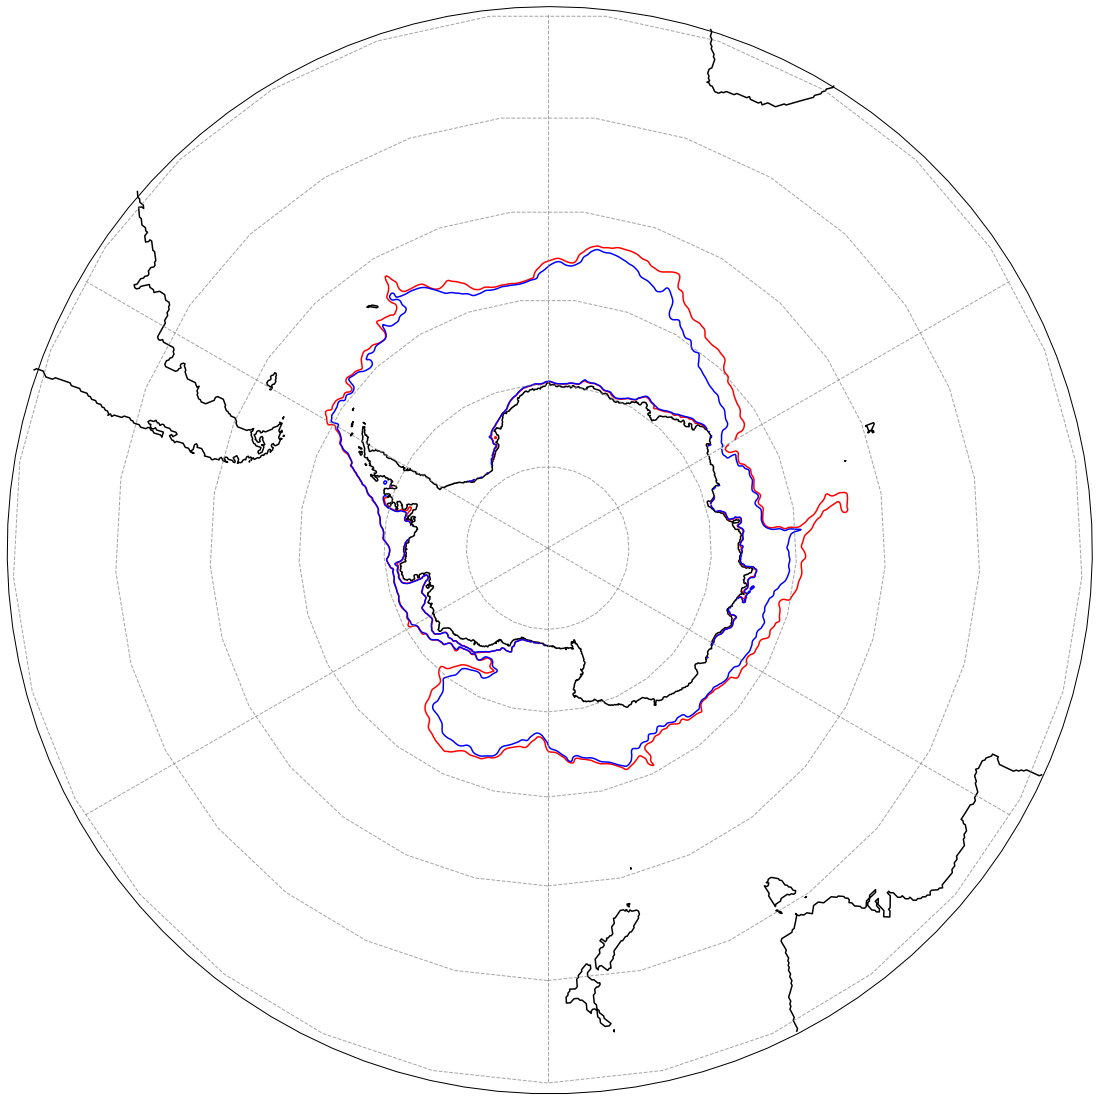

In [11]:
fig = plt.figure(figsize=[20, 20])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -29
so_basics(ax,land_mask,lat_north = -29)
ax.contour(ssh_mean_C1.xh, ssh_mean_C1.yh,ssh_mean_C1, levels = np.array([-1.585]), colors = 'r',alpha = 1,transform = ccrs.PlateCarree())
ax.contour(ssh_mean_C2.xh, ssh_mean_C2.yh,ssh_mean_C2, levels = np.array([-1.642]), colors = 'b',alpha = 1,transform = ccrs.PlateCarree())
plt.show()

In [7]:
cmems_obs = xr.open_mfdataset('/work/Ruth.Moorman/CMEMS_SSH/dataset-duacs-rep-global-merged-allsat-phy-l4*.nc')
# these data are dailyabsolute dynamic topography (ssh above the geiod)
cmems_obs = cmems_obs.adt
# the model run only goes to 2017, so may as well remove the latest years
cmems_obs_annual = cmems_obs.sel(time = slice(None, '2017')).groupby('time.year').mean()

In [13]:
# full 1993-2017 mean
cmems_obs_mean = cmems_obs_annual.mean(dim = 'year').load()
satellite_C1_ssh_mean = ssh_annual_C1.sel(time = slice('1993', None)).mean(dim = 'time').load()
satellite_C2_ssh_mean = ssh_annual_C2.sel(time = slice('1993', None)).mean(dim = 'time').load()

In [14]:
cmems_obs_annual = cmems_obs_annual.load()

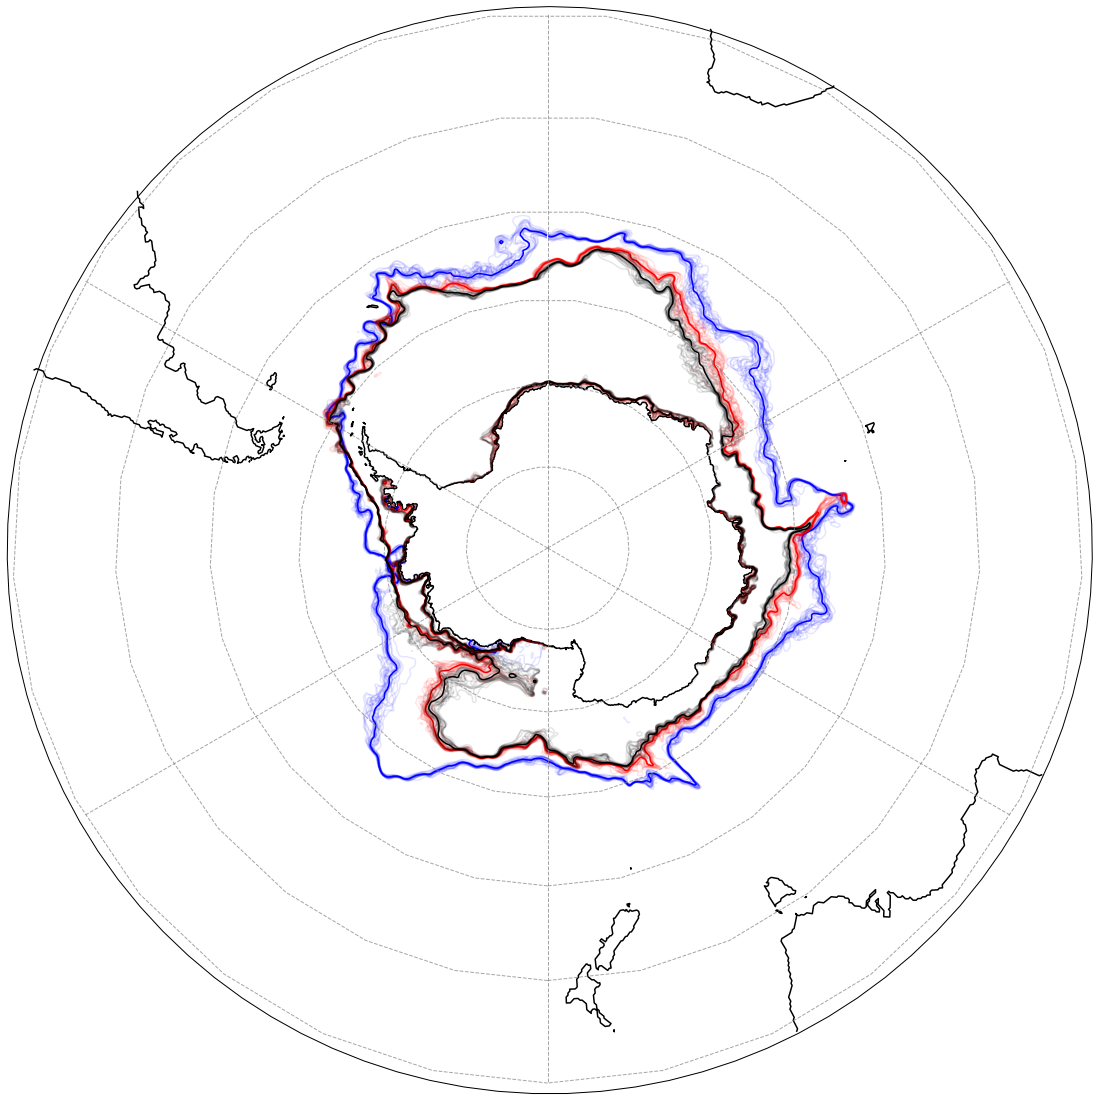

In [15]:
fig = plt.figure(figsize=[20, 20])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -29
so_basics(ax,land_mask,lat_north = -29)

ax.contour(cmems_obs_annual.isel(year = 0).longitude, cmems_obs_annual.isel(year = 0).latitude,cmems_obs_annual.isel(year = 0), levels = np.array([-1.086]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 1).longitude, cmems_obs_annual.isel(year = 1).latitude,cmems_obs_annual.isel(year = 1), levels = np.array([-1.073]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 2).longitude, cmems_obs_annual.isel(year = 2).latitude,cmems_obs_annual.isel(year = 2), levels = np.array([-1.088]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 3).longitude, cmems_obs_annual.isel(year = 3).latitude,cmems_obs_annual.isel(year = 3), levels = np.array([-1.0967]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 4).longitude, cmems_obs_annual.isel(year = 4).latitude,cmems_obs_annual.isel(year = 4), levels = np.array([-1.111]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 5).longitude, cmems_obs_annual.isel(year = 5).latitude,cmems_obs_annual.isel(year = 5), levels = np.array([-1.085]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 6).longitude, cmems_obs_annual.isel(year = 6).latitude,cmems_obs_annual.isel(year = 6), levels = np.array([-1.091]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 7).longitude, cmems_obs_annual.isel(year = 7).latitude,cmems_obs_annual.isel(year = 7), levels = np.array([-1.063]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 8).longitude, cmems_obs_annual.isel(year = 8).latitude,cmems_obs_annual.isel(year = 8), levels = np.array([-1.059]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 9).longitude, cmems_obs_annual.isel(year = 9).latitude,cmems_obs_annual.isel(year = 9), levels = np.array([-1.08]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 10).longitude, cmems_obs_annual.isel(year = 10).latitude,cmems_obs_annual.isel(year = 10), levels = np.array([-1.052]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 11).longitude, cmems_obs_annual.isel(year = 11).latitude,cmems_obs_annual.isel(year = 11), levels = np.array([-1.048]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 13).longitude, cmems_obs_annual.isel(year = 13).latitude,cmems_obs_annual.isel(year = 13), levels = np.array([-1.048]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 14).longitude, cmems_obs_annual.isel(year = 14).latitude,cmems_obs_annual.isel(year = 14), levels = np.array([-1.045]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 15).longitude, cmems_obs_annual.isel(year = 15).latitude,cmems_obs_annual.isel(year = 15), levels = np.array([-1.044]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 16).longitude, cmems_obs_annual.isel(year = 16).latitude,cmems_obs_annual.isel(year = 16), levels = np.array([-1.065]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 17).longitude, cmems_obs_annual.isel(year = 17).latitude,cmems_obs_annual.isel(year = 17), levels = np.array([-1.045]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 18).longitude, cmems_obs_annual.isel(year = 18).latitude,cmems_obs_annual.isel(year = 18), levels = np.array([-1.065]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree())
ax.contour(cmems_obs_annual.isel(year = 19).longitude, cmems_obs_annual.isel(year = 19).latitude,cmems_obs_annual.isel(year = 19), levels = np.array([-1.048]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 20).longitude, cmems_obs_annual.isel(year = 20).latitude,cmems_obs_annual.isel(year = 20), levels = np.array([-1.054]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 21).longitude, cmems_obs_annual.isel(year = 21).latitude,cmems_obs_annual.isel(year = 21), levels = np.array([-1.056]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 22).longitude, cmems_obs_annual.isel(year = 22).latitude,cmems_obs_annual.isel(year = 22), levels = np.array([-1.054]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 23).longitude, cmems_obs_annual.isel(year = 23).latitude,cmems_obs_annual.isel(year = 23), levels = np.array([-1.034]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(cmems_obs_annual.isel(year = 24).longitude, cmems_obs_annual.isel(year = 24).latitude,cmems_obs_annual.isel(year = 24), levels = np.array([-1.045]), colors = 'b',alpha = 0.1,transform = ccrs.PlateCarree())

ax.contour(cmems_obs_mean.longitude, cmems_obs_mean.latitude,cmems_obs_mean, levels = np.array([-1.065]), colors = 'b',alpha = 1,transform = ccrs.PlateCarree())

ax.contour(ssh_annual_C1.isel(time = 35).xh, ssh_annual_C1.isel(time = 35).yh,ssh_annual_C1.isel(time = 35), levels = np.array([-1.606]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1993
ax.contour(ssh_annual_C1.isel(time = 36).xh, ssh_annual_C1.isel(time = 36).yh,ssh_annual_C1.isel(time = 36), levels = np.array([-1.603]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1994
ax.contour(ssh_annual_C1.isel(time = 37).xh, ssh_annual_C1.isel(time = 37).yh,ssh_annual_C1.isel(time = 37), levels = np.array([-1.601]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1995
ax.contour(ssh_annual_C1.isel(time = 38).xh, ssh_annual_C1.isel(time = 38).yh,ssh_annual_C1.isel(time = 38), levels = np.array([-1.595]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1996
ax.contour(ssh_annual_C1.isel(time = 39).xh, ssh_annual_C1.isel(time = 39).yh,ssh_annual_C1.isel(time = 39), levels = np.array([-1.601]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1997
ax.contour(ssh_annual_C1.isel(time = 40).xh, ssh_annual_C1.isel(time = 40).yh,ssh_annual_C1.isel(time = 40), levels = np.array([-1.60]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1998
ax.contour(ssh_annual_C1.isel(time = 41).xh, ssh_annual_C1.isel(time = 41).yh,ssh_annual_C1.isel(time = 41), levels = np.array([-1.611]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 1999
ax.contour(ssh_annual_C1.isel(time = 42).xh, ssh_annual_C1.isel(time = 42).yh,ssh_annual_C1.isel(time = 42), levels = np.array([-1.599]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2000
ax.contour(ssh_annual_C1.isel(time = 43).xh, ssh_annual_C1.isel(time = 43).yh,ssh_annual_C1.isel(time = 43), levels = np.array([-1.611]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2001
ax.contour(ssh_annual_C1.isel(time = 44).xh, ssh_annual_C1.isel(time = 44).yh,ssh_annual_C1.isel(time = 44), levels = np.array([-1.618]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2002
ax.contour(ssh_annual_C1.isel(time = 45).xh, ssh_annual_C1.isel(time = 45).yh,ssh_annual_C1.isel(time = 45), levels = np.array([-1.607]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2003
ax.contour(ssh_annual_C1.isel(time = 46).xh, ssh_annual_C1.isel(time = 46).yh,ssh_annual_C1.isel(time = 46), levels = np.array([-1.614]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2004
ax.contour(ssh_annual_C1.isel(time = 47).xh, ssh_annual_C1.isel(time = 47).yh,ssh_annual_C1.isel(time = 47), levels = np.array([-1.613]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2005
ax.contour(ssh_annual_C1.isel(time = 48).xh, ssh_annual_C1.isel(time = 48).yh,ssh_annual_C1.isel(time = 48), levels = np.array([-1.602]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2006
ax.contour(ssh_annual_C1.isel(time = 49).xh, ssh_annual_C1.isel(time = 49).yh,ssh_annual_C1.isel(time = 49), levels = np.array([-1.605]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2007
ax.contour(ssh_annual_C1.isel(time = 50).xh, ssh_annual_C1.isel(time = 50).yh,ssh_annual_C1.isel(time = 50), levels = np.array([-1.607]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2008
ax.contour(ssh_annual_C1.isel(time = 51).xh, ssh_annual_C1.isel(time = 51).yh,ssh_annual_C1.isel(time = 51), levels = np.array([-1.605]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2009
ax.contour(ssh_annual_C1.isel(time = 52).xh, ssh_annual_C1.isel(time = 52).yh,ssh_annual_C1.isel(time = 52), levels = np.array([-1.605]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2010
ax.contour(ssh_annual_C1.isel(time = 53).xh, ssh_annual_C1.isel(time = 53).yh,ssh_annual_C1.isel(time = 53), levels = np.array([-1.595]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2011
ax.contour(ssh_annual_C1.isel(time = 54).xh, ssh_annual_C1.isel(time = 54).yh,ssh_annual_C1.isel(time = 54), levels = np.array([-1.602]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2012
ax.contour(ssh_annual_C1.isel(time = 55).xh, ssh_annual_C1.isel(time = 55).yh,ssh_annual_C1.isel(time = 55), levels = np.array([-1.609]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2013
ax.contour(ssh_annual_C1.isel(time = 56).xh, ssh_annual_C1.isel(time = 56).yh,ssh_annual_C1.isel(time = 56), levels = np.array([-1.614]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2014
ax.contour(ssh_annual_C1.isel(time = 57).xh, ssh_annual_C1.isel(time = 57).yh,ssh_annual_C1.isel(time = 57), levels = np.array([-1.625]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2015
ax.contour(ssh_annual_C1.isel(time = 58).xh, ssh_annual_C1.isel(time = 58).yh,ssh_annual_C1.isel(time = 58), levels = np.array([-1.638]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2016
ax.contour(ssh_annual_C1.isel(time = 59).xh, ssh_annual_C1.isel(time = 59).yh,ssh_annual_C1.isel(time = 59), levels = np.array([-1.64]), colors = 'r',alpha = 0.1,transform = ccrs.PlateCarree()) # 2017

ax.contour(satellite_C1_ssh_mean.xh, satellite_C1_ssh_mean.yh,satellite_C1_ssh_mean, levels = np.array([-1.611]), colors = 'r',alpha = 1,transform = ccrs.PlateCarree()) # 1993

ax.contour(ssh_annual_C2.isel(time = 35).xh, ssh_annual_C2.isel(time = 35).yh,ssh_annual_C2.isel(time = 35), levels = np.array([-1.643]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree())
ax.contour(ssh_annual_C2.isel(time = 36).xh, ssh_annual_C2.isel(time = 36).yh,ssh_annual_C2.isel(time = 36), levels = np.array([-1.628]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 37).xh, ssh_annual_C2.isel(time = 37).yh,ssh_annual_C2.isel(time = 37), levels = np.array([-1.63]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 38).xh, ssh_annual_C2.isel(time = 38).yh,ssh_annual_C2.isel(time = 38), levels = np.array([-1.611]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 39).xh, ssh_annual_C2.isel(time = 39).yh,ssh_annual_C2.isel(time = 39), levels = np.array([-1.622]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 40).xh, ssh_annual_C2.isel(time = 40).yh,ssh_annual_C2.isel(time = 40), levels = np.array([-1.624]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 41).xh, ssh_annual_C2.isel(time = 41).yh,ssh_annual_C2.isel(time = 41), levels = np.array([-1.64]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 42).xh, ssh_annual_C2.isel(time = 42).yh,ssh_annual_C2.isel(time = 42), levels = np.array([-1.637]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 43).xh, ssh_annual_C2.isel(time = 43).yh,ssh_annual_C2.isel(time = 43), levels = np.array([-1.656]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 44).xh, ssh_annual_C2.isel(time = 44).yh,ssh_annual_C2.isel(time = 44), levels = np.array([-1.666]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 45).xh, ssh_annual_C2.isel(time = 45).yh,ssh_annual_C2.isel(time = 45), levels = np.array([-1.644]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 46).xh, ssh_annual_C2.isel(time = 46).yh,ssh_annual_C2.isel(time = 46), levels = np.array([-1.663]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 47).xh, ssh_annual_C2.isel(time = 47).yh,ssh_annual_C2.isel(time = 47), levels = np.array([-1.662]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 48).xh, ssh_annual_C2.isel(time = 48).yh,ssh_annual_C2.isel(time = 48), levels = np.array([-1.652]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 49).xh, ssh_annual_C2.isel(time = 49).yh,ssh_annual_C2.isel(time = 49), levels = np.array([-1.635]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree())
ax.contour(ssh_annual_C2.isel(time = 50).xh, ssh_annual_C2.isel(time = 50).yh,ssh_annual_C2.isel(time = 50), levels = np.array([-1.648]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 51).xh, ssh_annual_C2.isel(time = 51).yh,ssh_annual_C2.isel(time = 51), levels = np.array([-1.640]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 52).xh, ssh_annual_C2.isel(time = 52).yh,ssh_annual_C2.isel(time = 52), levels = np.array([-1.647]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 53).xh, ssh_annual_C2.isel(time = 53).yh,ssh_annual_C2.isel(time = 53), levels = np.array([-1.651]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 54).xh, ssh_annual_C2.isel(time = 54).yh,ssh_annual_C2.isel(time = 54), levels = np.array([-1.655]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 55).xh, ssh_annual_C2.isel(time = 55).yh,ssh_annual_C2.isel(time = 55), levels = np.array([-1.654]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 56).xh, ssh_annual_C2.isel(time = 56).yh,ssh_annual_C2.isel(time = 56), levels = np.array([-1.668]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 57).xh, ssh_annual_C2.isel(time = 57).yh,ssh_annual_C2.isel(time = 57), levels = np.array([-1.676]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 58).xh, ssh_annual_C2.isel(time = 58).yh,ssh_annual_C2.isel(time = 58), levels = np.array([-1.679]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 
ax.contour(ssh_annual_C2.isel(time = 59).xh, ssh_annual_C2.isel(time = 59).yh,ssh_annual_C2.isel(time = 59), levels = np.array([-1.67]), colors = 'k',alpha = 0.1,transform = ccrs.PlateCarree()) 

ax.contour(satellite_C2_ssh_mean.xh, satellite_C2_ssh_mean.yh,satellite_C2_ssh_mean, levels = np.array([-1.642]), colors = 'k',alpha = 1,transform = ccrs.PlateCarree())

plt.show()

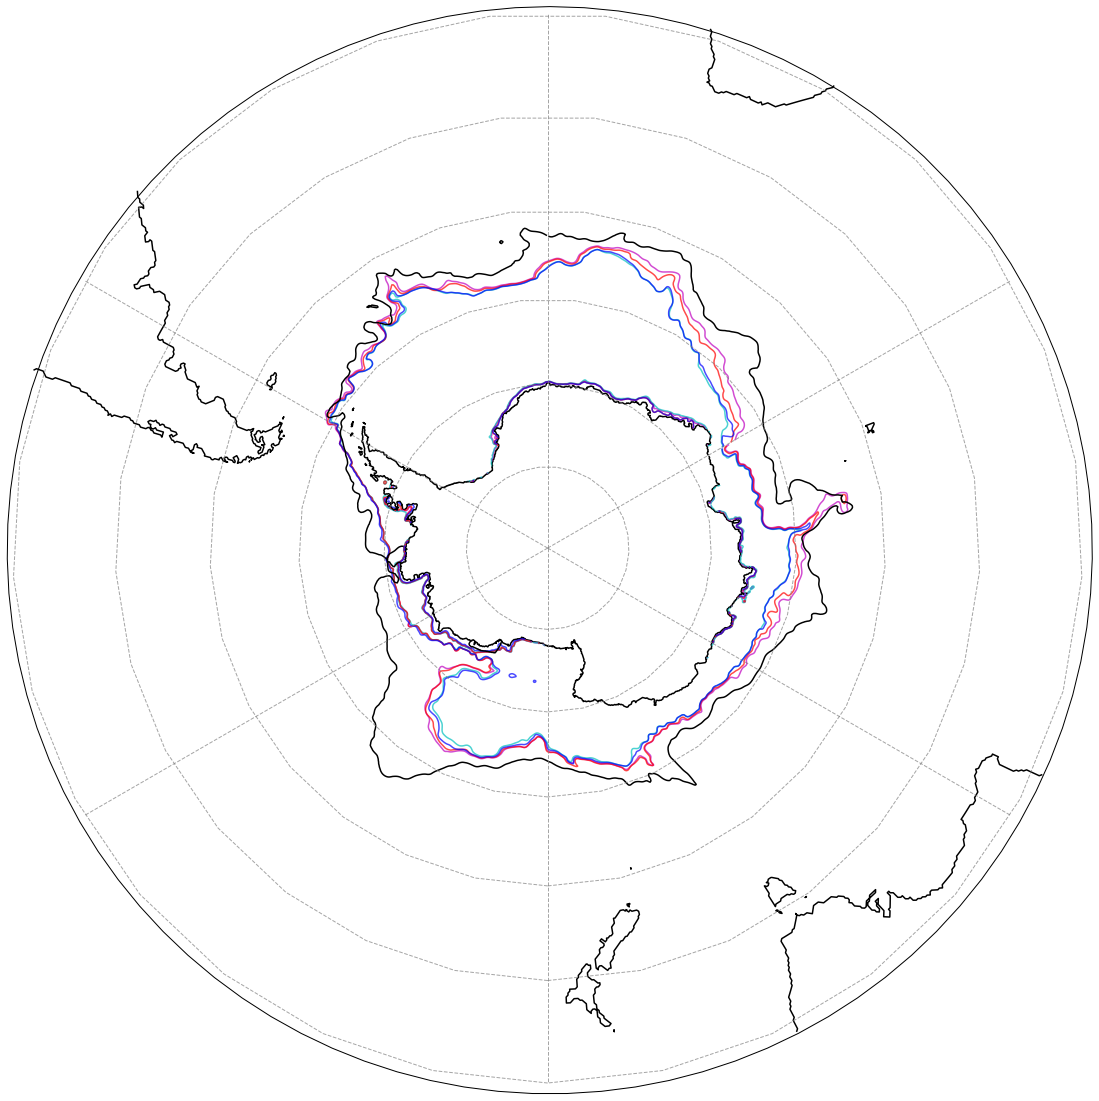

In [16]:
fig = plt.figure(figsize=[20, 20])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -29
so_basics(ax,land_mask,lat_north = -29)
ax.contour(ssh_mean_C1.xh, ssh_mean_C1.yh,ssh_mean_C1, levels = np.array([-1.585]), colors = 'm',alpha = 0.7,transform = ccrs.PlateCarree())
ax.contour(ssh_mean_C2.xh, ssh_mean_C2.yh,ssh_mean_C2, levels = np.array([-1.642]), colors = 'c',alpha = 0.7,transform = ccrs.PlateCarree())
ax.contour(satellite_C1_ssh_mean.xh, satellite_C1_ssh_mean.yh,satellite_C1_ssh_mean, levels = np.array([-1.611]), colors = 'r',alpha = 0.71,transform = ccrs.PlateCarree()) # 1993
ax.contour(satellite_C2_ssh_mean.xh, satellite_C2_ssh_mean.yh,satellite_C2_ssh_mean, levels = np.array([-1.642]), colors = 'b',alpha = 0.71,transform = ccrs.PlateCarree())
ax.contour(cmems_obs_mean.longitude, cmems_obs_mean.latitude,cmems_obs_mean, levels = np.array([-1.065]), colors = 'k',alpha = 1,transform = ccrs.PlateCarree())
plt.show()

Now let's compare to f/H contours (for not, take H to be the distance from the resting ocean surface to bathymetry, i.e. ocean bathymetry diags and neglect the effect of $\nu$, deviations of the free surface which the ssh contours themselves provide, later look to the sigificance of this simplification...)

All the above was done by manually identifying contours. Since I wanted to pursue this avenue further I generated scripts to identify the southernmost continuous circumpolar contour and approximate the contour itslef, generate appropriate masks, generate an along contour index, all that jazz.

Now that I Have this (see continuous_contour_generation.ipynb for details) I can try reproducing the above with this method, and then dig futher into the variability (seasonal etc, could even look at daily fluctuations to generate statistics...). I could look at the standard deviation of the position of the contour either as a function of longitude (tricky due non functional nature...) or the along isobath index (tricky due to non static max index...)


Oooh I can look at model output f/H as a function of the along isobath index! That would be cool!

In [6]:
lat_north = -29
static = xr.open_dataset(cycle1+'ocean_static/20170101.ocean_static.nc')
bathy = static.deptho.sel(yh = slice(-90,lat_north))
land_mask = static.wet.sel(yh = slice(-90,lat_north))
# ssh_annual_C1 = get_iaf_variable(expdir,1, 'ocean_annual', 'zos')
# ssh_annual_C2 = get_iaf_variable(expdir,2,'ocean_annual', 'zos')
# ssh_annual_C3 = get_iaf_variable(expdir,3, 'ocean_annual', 'zos')

In [6]:
ssh_month_C1 = get_iaf_variable(expdir,1, 'ocean_month', 'zos')
# ssh_month_C2 = get_iaf_variable(expdir,2, 'ocean_month', 'zos')
# ssh_month_C3 = get_iaf_variable(expdir,3, 'ocean_month', 'zos')

In [7]:
ssh_day_C1 = get_iaf_variable(expdir,1, 'ocean_daily', 'zos')
# ssh_day_C2 = get_iaf_variable(expdir,2, 'ocean_day', 'zos')
# ssh_day_C3 = get_iaf_variable(expdir,3, 'ocean_day', 'zos')

### cycle1: annual, full time mean, satellite era mean, monthly climatology (full), monthly climatology (satellite), daily over one year (or shorter/longer?)

In [49]:
## cycle1, all years and time mean
ssh_annual_C1 = ssh_annual_C1.load()

In [9]:
# initate empty for masks
empty = np.empty((60,382,1440))
empty[:,:,:] = np.nan
ssh_mask_c1_annual = xr.DataArray(empty, coords = ssh_annual_C1.coords)
ssh_mask_c1_annual.attrs['long_name'] = 'Mask for the region south of the southernmost cicumpolar continuous ssh contour'
ssh_mask_c1_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# initate empty for numbers (in case later you want to do the index thing, might as well compute once)
empty = np.empty((60,382,1440))
empty[:,:,:] = np.nan
ssh_numbers_c1_annual = xr.DataArray(empty, coords = ssh_annual_C1.coords)
ssh_numbers_c1_annual.attrs['long_name'] = 'Numbered southernmost cicumpolar continuous ssh contour'
ssh_numbers_c1_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# intiate empty for ssh value at contour
empty = np.empty((60))
empty[:] = np.nan
ssh_contour_value = xr.DataArray(empty, coords = [ssh_annual_C1.time], dims = 'time')

In [19]:
range_min = np.round(ssh_annual_C1.isel(xh = 0).min(dim = 'yh').values, decimals = 3)

In [24]:
%%time
for y in range(60):
    print(y)
    test_range = np.arange(range_min[y]+0.002, -1.4, 0.001)
    contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_annual_C1.isel(time = y), test_range, lat_north = -29)
    ssh_mask_c1_annual[y,:,:] = contour_mask.values
    ssh_numbers_c1_annual[y,:,:] = contour_numbered.values
    ssh_contour_value[y] = contour_depth

0
Southernmost circumpolar continuous profile at ssh =  -1.5620000524521018
last_index_i, last_index_j (array([1439]), 185)
1
Southernmost circumpolar continuous profile at ssh =  -1.5680000524521012
last_index_i, last_index_j (array([1439]), array([184]))
2
Southernmost circumpolar continuous profile at ssh =  -1.5629999618530384
last_index_i, last_index_j (array([1439]), array([184]))
3
Southernmost circumpolar continuous profile at ssh =  -1.5519999437332241
last_index_i, last_index_j (array([1439]), array([188]))
4
Southernmost circumpolar continuous profile at ssh =  -1.5689999713897798
last_index_i, last_index_j (array([1439]), 183)
5
Southernmost circumpolar continuous profile at ssh =  -1.5739999618530371
last_index_i, last_index_j (array([1439]), array([184]))
6
Southernmost circumpolar continuous profile at ssh =  -1.5499999599456886
last_index_i, last_index_j (array([1439]), array([182]))
7
Southernmost circumpolar continuous profile at ssh =  -1.5439999952316377
last_index_

In [28]:
ssh_numbers_c1_annual = xr.DataArray(ssh_numbers_c1_annual, coords = {'time':ssh_numbers_c1_annual.time, 'yh':ssh_numbers_c1_annual.yh, 'xh':ssh_numbers_c1_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_numbers_c1_annual.attrs)
ssh_mask_c1_annual = xr.DataArray(ssh_mask_c1_annual, coords = {'time':ssh_mask_c1_annual.time, 'yh':ssh_mask_c1_annual.yh, 'xh':ssh_mask_c1_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_mask_c1_annual.attrs)
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c1_annual, 'contour_masked_south':ssh_mask_c1_annual})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1958-2017_annual_SCC-ssh_contour.nc')

In [8]:
# full time mean
ssh_mean_C1 = ssh_annual_C1.mean(dim = 'time').load()
range_min = np.round(ssh_mean_C1.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_mean_C1, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_mask.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = '-1.585 m'
contour_mask.attrs['contour_ssh_value'] = '-1.585 m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1958-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.5850000247955418
last_index_i, last_index_j (array([1439]), array([171]))


In [9]:
# satellite era time mean
ssh_satellite_mean_C1 = ssh_annual_C1.sel(time = slice('1993','2017')).mean(dim = 'time').load()
range_min = np.round(ssh_satellite_mean_C1.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_satellite_mean_C1, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_mask.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = '-1.611 m'
contour_mask.attrs['contour_ssh_value'] = '-1.611 m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1993-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.6109999961853128
last_index_i, last_index_j (array([1439]), 166)


In [12]:
# reload annual and time mean data for cycle1
cycle1_ssh_annual = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1958-2017_annual_SCC-ssh_contour.nc')
cycle1_ssh_annual_mask = cycle1_ssh_annual.contour_masked_south
cycle1_ssh_mean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1958-2017_mean_SCC-ssh_contour.nc')
cycle1_ssh_mean_mask = cycle1_ssh_mean.contour_masked_south
cycle1_ssh_satmean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1993-2017_mean_SCC-ssh_contour.nc')
cycle1_ssh_satmean_mask = cycle1_ssh_satmean.contour_masked_south

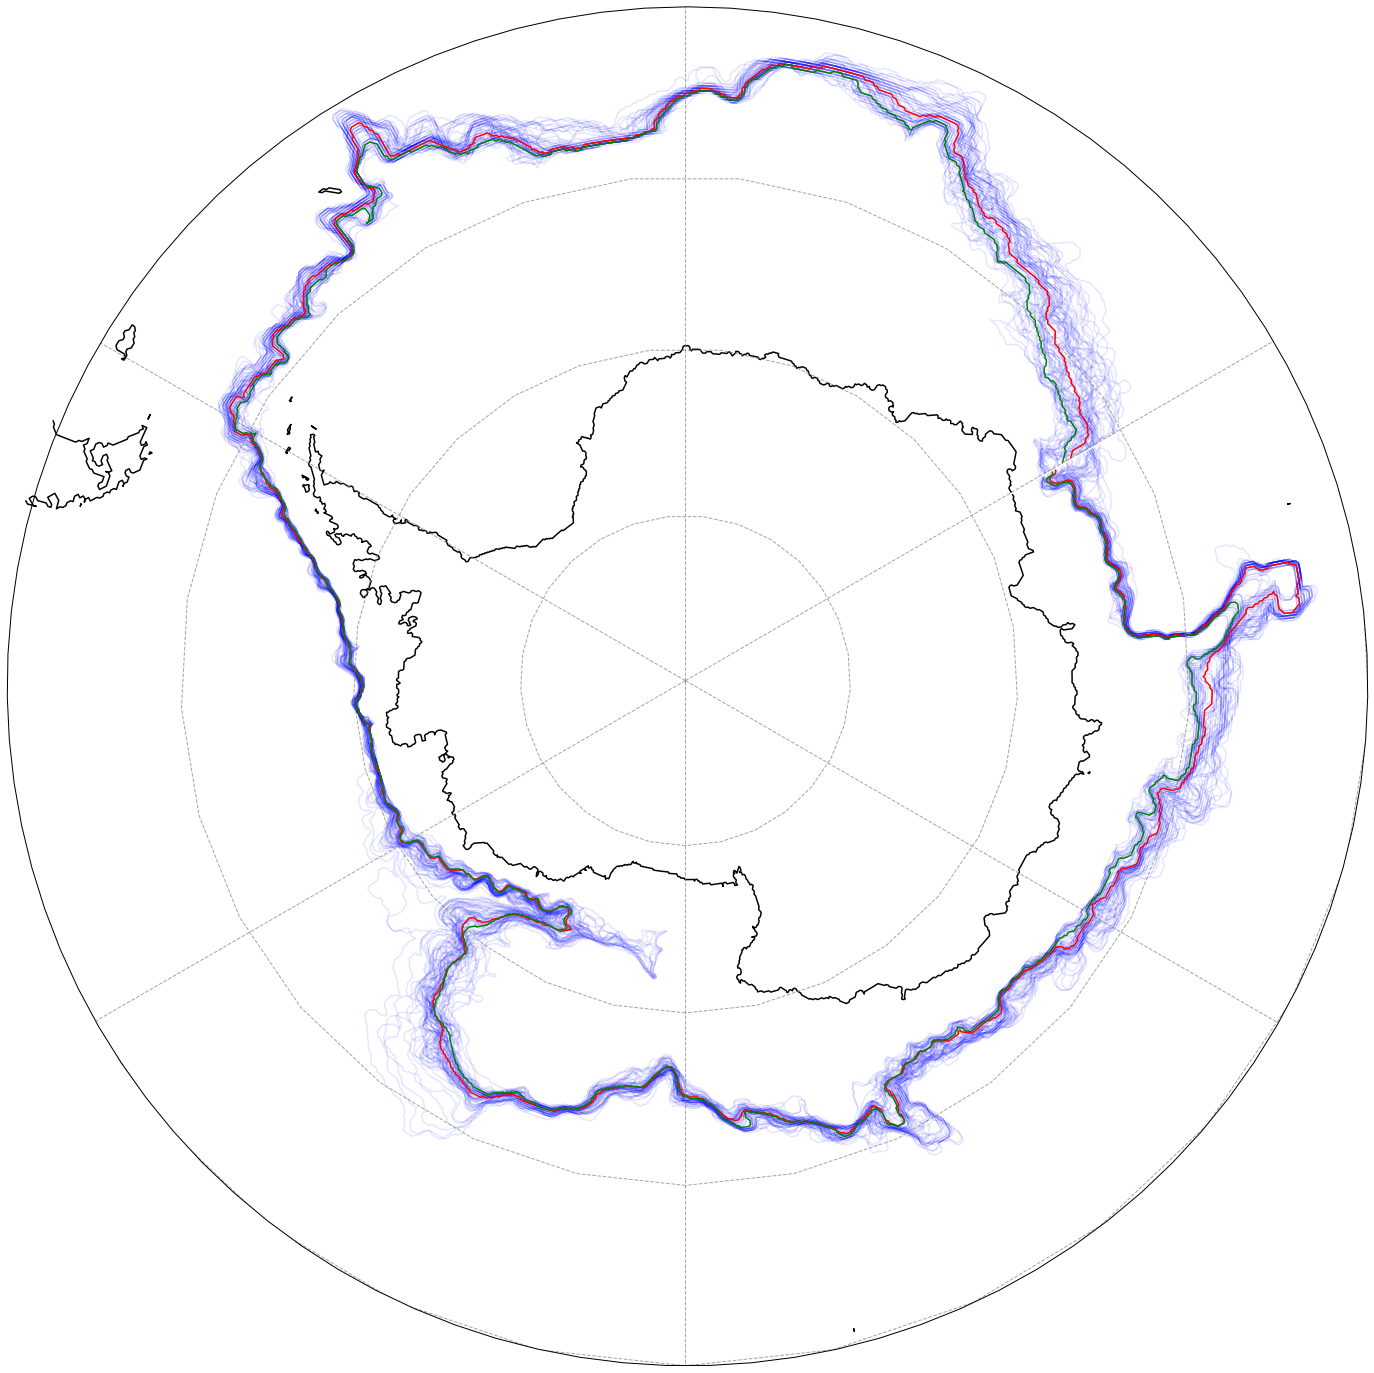

In [14]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
for i in range(60):
    ax.contour(cycle1_ssh_annual_mask.isel(time = i).xh, cycle1_ssh_annual_mask.isel(time = i).yh,cycle1_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1, transform = ccrs.PlateCarree())
ax.contour(cycle1_ssh_mean_mask.xh, cycle1_ssh_mean_mask.yh,cycle1_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1, transform = ccrs.PlateCarree())
ax.contour(cycle1_ssh_satmean_mask.xh, cycle1_ssh_satmean_mask.yh,cycle1_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1, transform = ccrs.PlateCarree())
plt.show()

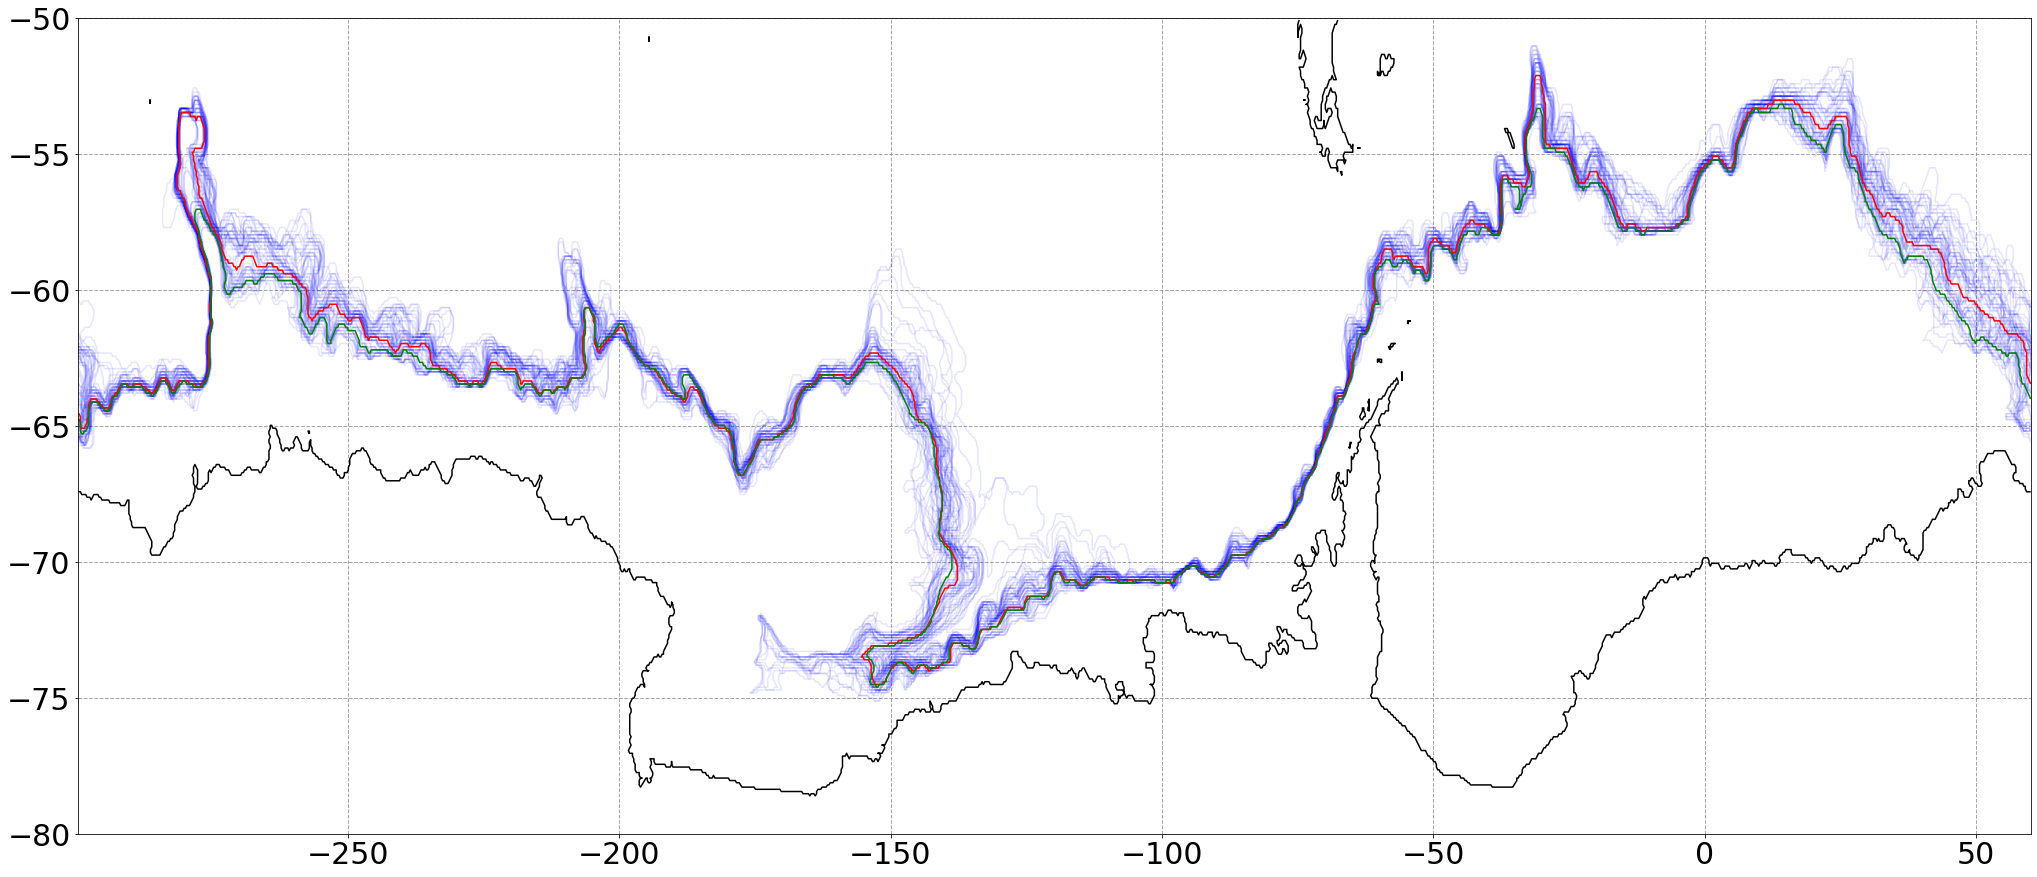

In [30]:
fig = plt.figure(figsize=[35, 15])
ax = plt.subplot()
lat_north = -50
ax.contour(land_mask.sel(yh = slice(-90,lat_north)).xh, land_mask.sel(yh = slice(-90,lat_north)).yh,land_mask.sel(yh = slice(-90,lat_north)),[0,1], colors = 'k', alpha = 1)
ax.set_yticks([-80,-75,-70,-65, -60,-55, -50], minor=False)
ax.grid(linewidth = 1, color = 'grey', linestyle = '--', alpha = 0.7)
for i in range(60):
    ax.contour(cycle1_ssh_annual_mask.isel(time = i).xh, cycle1_ssh_annual_mask.isel(time = i).yh,cycle1_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1)
ax.contour(cycle1_ssh_mean_mask.xh, cycle1_ssh_mean_mask.yh,cycle1_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1)
ax.contour(cycle1_ssh_satmean_mask.xh, cycle1_ssh_satmean_mask.yh,cycle1_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1)
ax.set_ylim([-80,lat_north])
plt.show()

In [ ]:
# satellite era monthly climatology
satellite_ssh_climatology_C1 = ssh_month_C1.sel(time = slice('1993', '2017')).groupby('time.month').mean()

In [16]:
satellite_ssh_climatology_C1 = satellite_ssh_climatology_C1.load()

In [14]:
# initate empty for masks
empty = np.empty((12,382,1440))
empty[:,:,:] = np.nan
ssh_mask_c1_satclim = xr.DataArray(empty, coords = satellite_ssh_climatology_C1.coords)
ssh_mask_c1_satclim.attrs['long_name'] = 'Mask for the region south of the southernmost cicumpolar continuous ssh contour'
ssh_mask_c1_satclim.attrs['time_avg_info'] = 'satellite era (1993-2017) monthly climatology ssh used'
# initate empty for numbers (in case later you want to do the index thing, might as well compute once)
empty = np.empty((12,382,1440))
empty[:,:,:] = np.nan
ssh_numbers_c1_satclim = xr.DataArray(empty, coords = satellite_ssh_climatology_C1.coords)
ssh_numbers_c1_satclim.attrs['long_name'] = 'Numbered southernmost cicumpolar continuous ssh contour'
ssh_numbers_c1_satclim.attrs['time_avg_info'] = 'satellite era (1993-2017) monthly climatology ssh used'
# intiate empty for ssh value at contour
empty = np.empty((12))
empty[:] = np.nan
ssh_contour_value = xr.DataArray(empty, coords = [satellite_ssh_climatology_C1.month], dims = 'month')

In [17]:
range_min = np.round(satellite_ssh_climatology_C1.isel(xh = 0).min(dim = 'yh').values, decimals = 3)

In [22]:
%%time
for y in range(12):
    print(y)
    test_range = np.arange(range_min[y]+0.002, -1.4, 0.001)
    contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(satellite_ssh_climatology_C1.isel(month = y), test_range, lat_north = -29)
    ssh_mask_c1_satclim[y,:,:] = contour_mask.values
    ssh_numbers_c1_satclim[y,:,:] = contour_numbered.values
    ssh_contour_value[y] = contour_depth

0
Southernmost circumpolar continuous profile at ssh =  -1.6010000476837265
last_index_i, last_index_j (array([1439]), array([160]))
1
Southernmost circumpolar continuous profile at ssh =  -1.6010000009536849
last_index_i, last_index_j (array([1439]), array([160]))
2
Southernmost circumpolar continuous profile at ssh =  -1.603999954223643
last_index_i, last_index_j (array([1439]), array([164]))
3
Southernmost circumpolar continuous profile at ssh =  -1.6120000524520963
last_index_i, last_index_j (array([1439]), array([168]))
4
Southernmost circumpolar continuous profile at ssh =  -1.6140000267028898
last_index_i, last_index_j (array([1439]), array([177]))
5
Southernmost circumpolar continuous profile at ssh =  -1.610000005722055
last_index_i, last_index_j (array([1439]), array([179]))
6
Southernmost circumpolar continuous profile at ssh =  -1.6089999847412197
last_index_i, last_index_j (array([1439]), array([177]))
7
Southernmost circumpolar continuous profile at ssh =  -1.614000021934

In [51]:
ssh_numbers_c1_satclim = xr.DataArray(ssh_numbers_c1_satclim, coords = {'month':ssh_numbers_c1_satclim.month, 'yh':ssh_numbers_c1_satclim.yh, 'xh':ssh_numbers_c1_satclim.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_numbers_c1_satclim.attrs)
ssh_mask_c1_satclim = xr.DataArray(ssh_mask_c1_satclim, coords = {'month':ssh_mask_c1_satclim.month, 'yh':ssh_mask_c1_satclim.yh, 'xh':ssh_mask_c1_satclim.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_mask_c1_satclim.attrs)
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c1_satclim, 'contour_masked_south':ssh_mask_c1_satclim})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1993-2017_climatology_SCC-ssh_contour.nc')

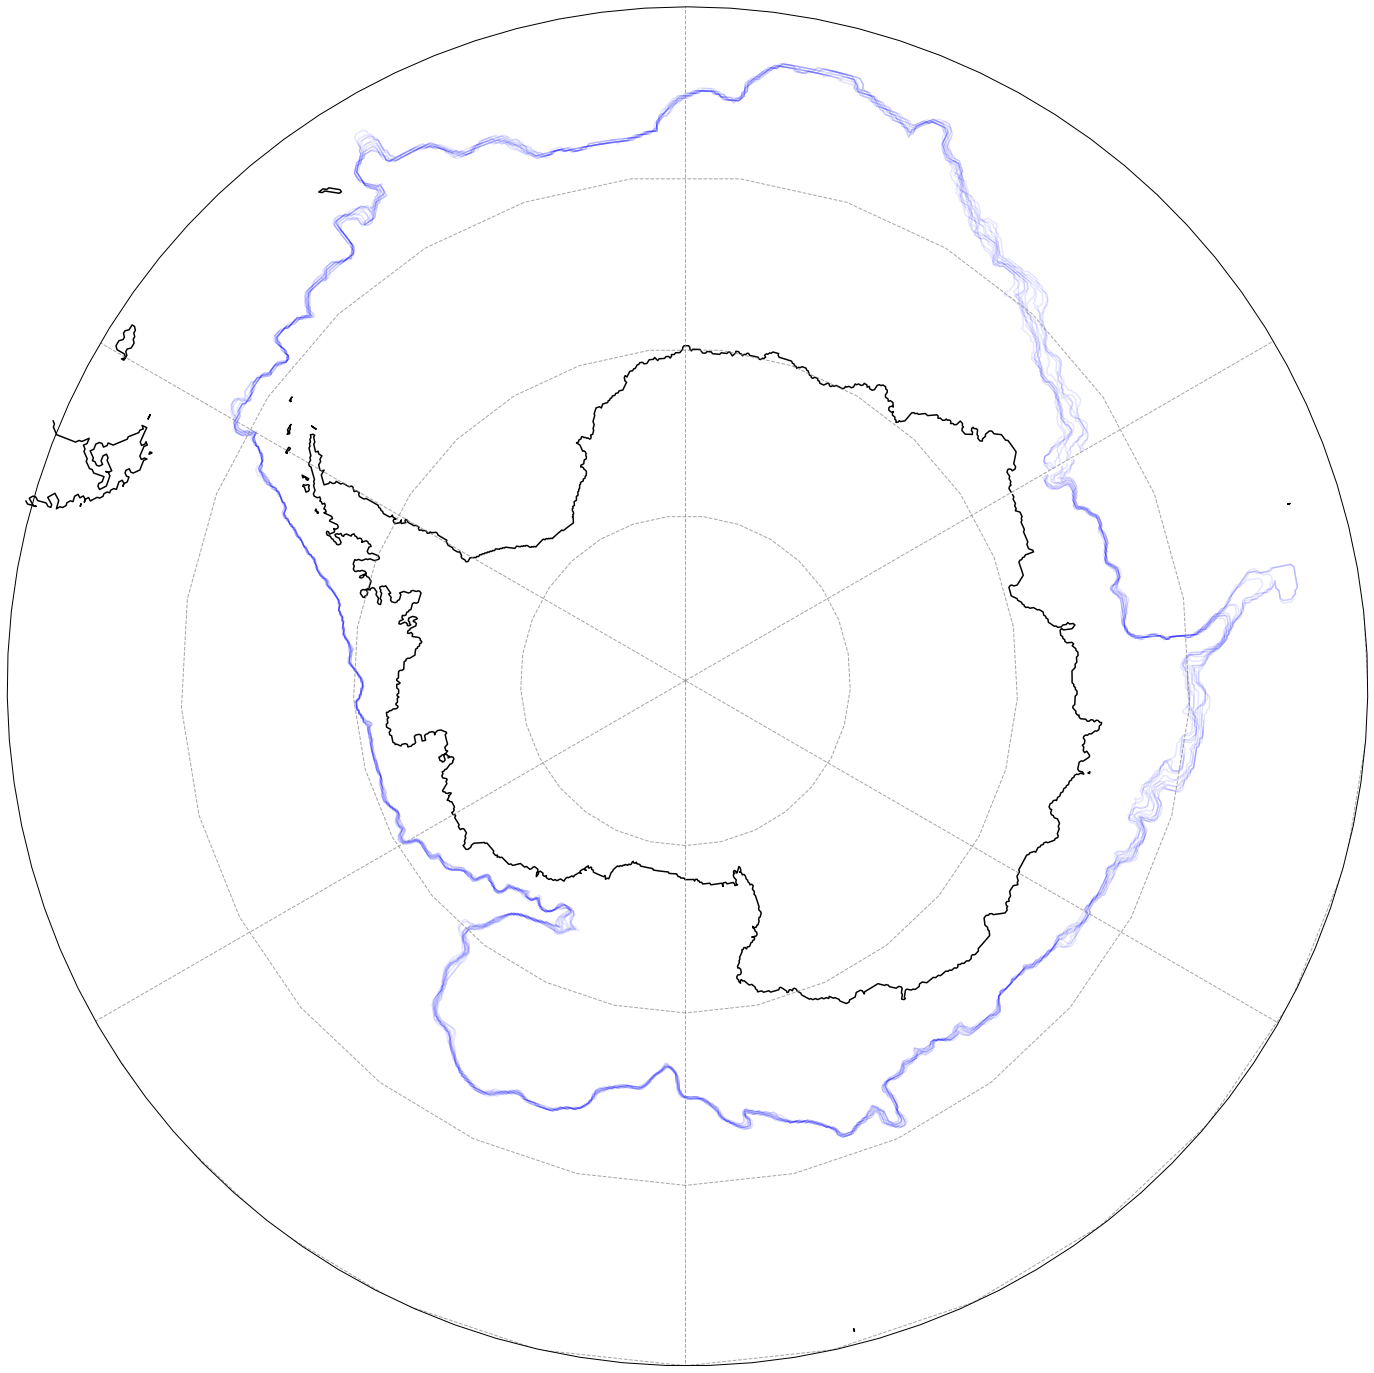

In [50]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
for i in range(12):
    ax.contour(ssh_mask_c1_satclim.isel(month = i).xh, ssh_mask_c1_satclim.isel(month = i).yh,ssh_mask_c1_satclim.isel(month = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1, transform = ccrs.PlateCarree())
plt.show()

In [8]:
# daily variability over the final year of the cycle (2017)
# try a test day first
ssh_day_C1_2017 = ssh_day_C1.sel(time = '2017')

In [9]:
ssh_day_C1_2017 = ssh_day_C1_2017.load()

In [10]:
# initate empty for masks
empty = np.empty((365,382,1440))
empty[:,:,:] = np.nan
ssh_mask_c1_daily = xr.DataArray(empty, coords = ssh_day_C1_2017.coords)
ssh_mask_c1_daily.attrs['long_name'] = 'Mask for the region south of the southernmost cicumpolar continuous ssh contour'
ssh_mask_c1_daily.attrs['time_avg_info'] = 'daily mean ssh used'
# initate empty for numbers (in case later you want to do the index thing, might as well compute once)
empty = np.empty((365,382,1440))
empty[:,:,:] = np.nan
ssh_numbers_c1_daily = xr.DataArray(empty, coords = ssh_day_C1_2017.coords)
ssh_numbers_c1_daily.attrs['long_name'] = 'Numbered southernmost cicumpolar continuous ssh contour'
ssh_numbers_c1_daily.attrs['time_avg_info'] = 'daily mean ssh used'
# intiate empty for ssh value at contour
empty = np.empty((365))
empty[:] = np.nan
ssh_contour_value = xr.DataArray(empty, coords = [ssh_day_C1_2017.time], dims = 'time')

In [11]:
range_min = np.round(ssh_day_C1_2017.isel(xh = 0).min(dim = 'yh').values, decimals = 3)

In [12]:
%%time
# (will take about 3h...thus only one year attempted)
for y in range(365):
    print(y)
    test_range = np.arange(range_min[y]+0.002, -1.4, 0.001)
    contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_day_C1_2017.isel(time = y), test_range, lat_north = -29)
    ssh_mask_c1_daily[y,:,:] = contour_mask.values
    ssh_numbers_c1_daily[y,:,:] = contour_numbered.values
    ssh_contour_value[y] = contour_depth

0
Southernmost circumpolar continuous profile at ssh =  -1.605999979972849
last_index_i, last_index_j (array([1439]), array([170]))
1
Southernmost circumpolar continuous profile at ssh =  -1.614000042915354
last_index_i, last_index_j (array([1439]), array([169]))
2
Southernmost circumpolar continuous profile at ssh =  -1.622999965667734
last_index_i, last_index_j (array([1439]), array([158]))
3
Southernmost circumpolar continuous profile at ssh =  -1.6030000028610358
last_index_i, last_index_j (array([1439]), array([193]))
4
Southernmost circumpolar continuous profile at ssh =  -1.6189999704361056
last_index_i, last_index_j (array([1439]), array([195]))
5
Southernmost circumpolar continuous profile at ssh =  -1.6150000219345186
last_index_i, last_index_j (array([1439]), array([195]))
6
Southernmost circumpolar continuous profile at ssh =  -1.6310000381469811
last_index_i, last_index_j (array([1439]), array([156]))
7
Southernmost circumpolar continuous profile at ssh =  -1.6240000381469

62
Southernmost circumpolar continuous profile at ssh =  -1.5789999685287588
last_index_i, last_index_j (array([1439]), array([178]))
63
Southernmost circumpolar continuous profile at ssh =  -1.5729999990463368
last_index_i, last_index_j (array([1439]), array([177]))
64
Southernmost circumpolar continuous profile at ssh =  -1.572000008583079
last_index_i, last_index_j (array([1439]), array([177]))
65
Southernmost circumpolar continuous profile at ssh =  -1.5930000505447472
last_index_i, last_index_j (array([1439]), array([177]))
66
Southernmost circumpolar continuous profile at ssh =  -1.6029999475479209
last_index_i, last_index_j (array([1439]), array([178]))
67
Southernmost circumpolar continuous profile at ssh =  -1.604999963760385
last_index_i, last_index_j (array([1439]), array([177]))
68
Southernmost circumpolar continuous profile at ssh =  -1.5969999542236437
last_index_i, last_index_j (array([1439]), array([177]))
69
Southernmost circumpolar continuous profile at ssh =  -1.5830

124
Southernmost circumpolar continuous profile at ssh =  -1.641999958038341
last_index_i, last_index_j (array([1439]), array([182]))
125
Southernmost circumpolar continuous profile at ssh =  -1.6469999647140627
last_index_i, last_index_j (array([1439]), array([182]))
126
Southernmost circumpolar continuous profile at ssh =  -1.653999969482433
last_index_i, last_index_j (array([1439]), array([180]))
127
Southernmost circumpolar continuous profile at ssh =  -1.650999953269969
last_index_i, last_index_j (array([1439]), array([179]))
128
Southernmost circumpolar continuous profile at ssh =  -1.6369999628067127
last_index_i, last_index_j (array([1439]), array([179]))
129
Southernmost circumpolar continuous profile at ssh =  -1.6299999532699714
last_index_i, last_index_j (array([1439]), array([181]))
130
Southernmost circumpolar continuous profile at ssh =  -1.6320000467300544
last_index_i, last_index_j (array([1439]), array([180]))
131
Southernmost circumpolar continuous profile at ssh =  

185
Southernmost circumpolar continuous profile at ssh =  -1.650999948501598
last_index_i, last_index_j (array([1439]), array([158]))
186
Southernmost circumpolar continuous profile at ssh =  -1.6469999485015985
last_index_i, last_index_j (array([1439]), array([161]))
187
Southernmost circumpolar continuous profile at ssh =  -1.6540000114441036
last_index_i, last_index_j (array([1439]), array([161]))
188
Southernmost circumpolar continuous profile at ssh =  -1.6510000228881971
last_index_i, last_index_j (array([1439]), array([166]))
189
Southernmost circumpolar continuous profile at ssh =  -1.6649999551773187
last_index_i, last_index_j (array([1439]), array([174]))
190
Southernmost circumpolar continuous profile at ssh =  -1.6679999856948957
last_index_i, last_index_j (array([1439]), array([153]))
191
Southernmost circumpolar continuous profile at ssh =  -1.656000053405774
last_index_i, last_index_j (array([1439]), array([154]))
192
Southernmost circumpolar continuous profile at ssh = 

246
Southernmost circumpolar continuous profile at ssh =  -1.661000032424938
last_index_i, last_index_j (array([1439]), array([154]))
247
Southernmost circumpolar continuous profile at ssh =  -1.6719999876022464
last_index_i, last_index_j (array([1439]), array([155]))
248
Southernmost circumpolar continuous profile at ssh =  -1.6769999828338749
last_index_i, last_index_j (array([1439]), array([154]))
249
Southernmost circumpolar continuous profile at ssh =  -1.66299995994569
last_index_i, last_index_j (array([1439]), array([153]))
250
Southernmost circumpolar continuous profile at ssh =  -1.6580000419616805
last_index_i, last_index_j (array([1439]), array([154]))
251
Southernmost circumpolar continuous profile at ssh =  -1.6610000419616802
last_index_i, last_index_j (array([1439]), array([155]))
252
Southernmost circumpolar continuous profile at ssh =  -1.6720000324249369
last_index_i, last_index_j (array([1439]), array([154]))
253
Southernmost circumpolar continuous profile at ssh =  

307
Southernmost circumpolar continuous profile at ssh =  -1.636999979019177
last_index_i, last_index_j (array([1439]), array([178]))
308
Southernmost circumpolar continuous profile at ssh =  -1.631999943733229
last_index_i, last_index_j (array([1439]), array([179]))
309
Southernmost circumpolar continuous profile at ssh =  -1.628999990463271
last_index_i, last_index_j (array([1439]), array([179]))
310
Southernmost circumpolar continuous profile at ssh =  -1.6380000209808474
last_index_i, last_index_j (array([1439]), array([175]))
311
Southernmost circumpolar continuous profile at ssh =  -1.6320000419616834
last_index_i, last_index_j (array([1439]), array([178]))
312
Southernmost circumpolar continuous profile at ssh =  -1.6519999904632685
last_index_i, last_index_j (array([1439]), array([174]))
313
Southernmost circumpolar continuous profile at ssh =  -1.6479999599456916
last_index_i, last_index_j (array([1439]), array([173]))
314
Southernmost circumpolar continuous profile at ssh =  

In [13]:
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c1_daily, 'contour_masked_south':ssh_mask_c1_daily})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_2017_daily_SCC-ssh_contour.nc')

In [16]:
ssh_numbers_c1_daily = xr.DataArray(ssh_numbers_c1_daily, coords = {'time':ssh_numbers_c1_daily.time, 'yh':ssh_numbers_c1_daily.yh, 'xh':ssh_numbers_c1_daily.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_numbers_c1_daily.attrs)
ssh_mask_c1_daily = xr.DataArray(ssh_mask_c1_daily, coords = {'time':ssh_mask_c1_daily.time, 'yh':ssh_mask_c1_daily.yh, 'xh':ssh_mask_c1_daily.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_mask_c1_daily.attrs)


In [17]:
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c1_daily, 'contour_masked_south':ssh_mask_c1_daily})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_2017_daily_SCC-ssh_contour.nc')

In [18]:
ds = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_2017_daily_SCC-ssh_contour.nc')
ssh_mask_c1_daily2017 = ds.contour_masked_south

In [19]:
ssh_mask_c1_daily2017

<xarray.DataArray 'contour_masked_south' (time: 365, yh: 382, xh: 1440)>
[200779200 values with dtype=float64]
Coordinates:
  * time               (time) object 2017-01-01 12:00:00 ... 2017-12-31 12:00:00
  * yh                 (yh) float64 -80.39 -80.31 -80.23 ... -29.37 -29.15
  * xh                 (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
    ssh_contour_value  (time) float64 ...
Attributes:
    long_name:      Mask for the region south of the southernmost cicumpolar ...
    time_avg_info:  daily mean ssh used

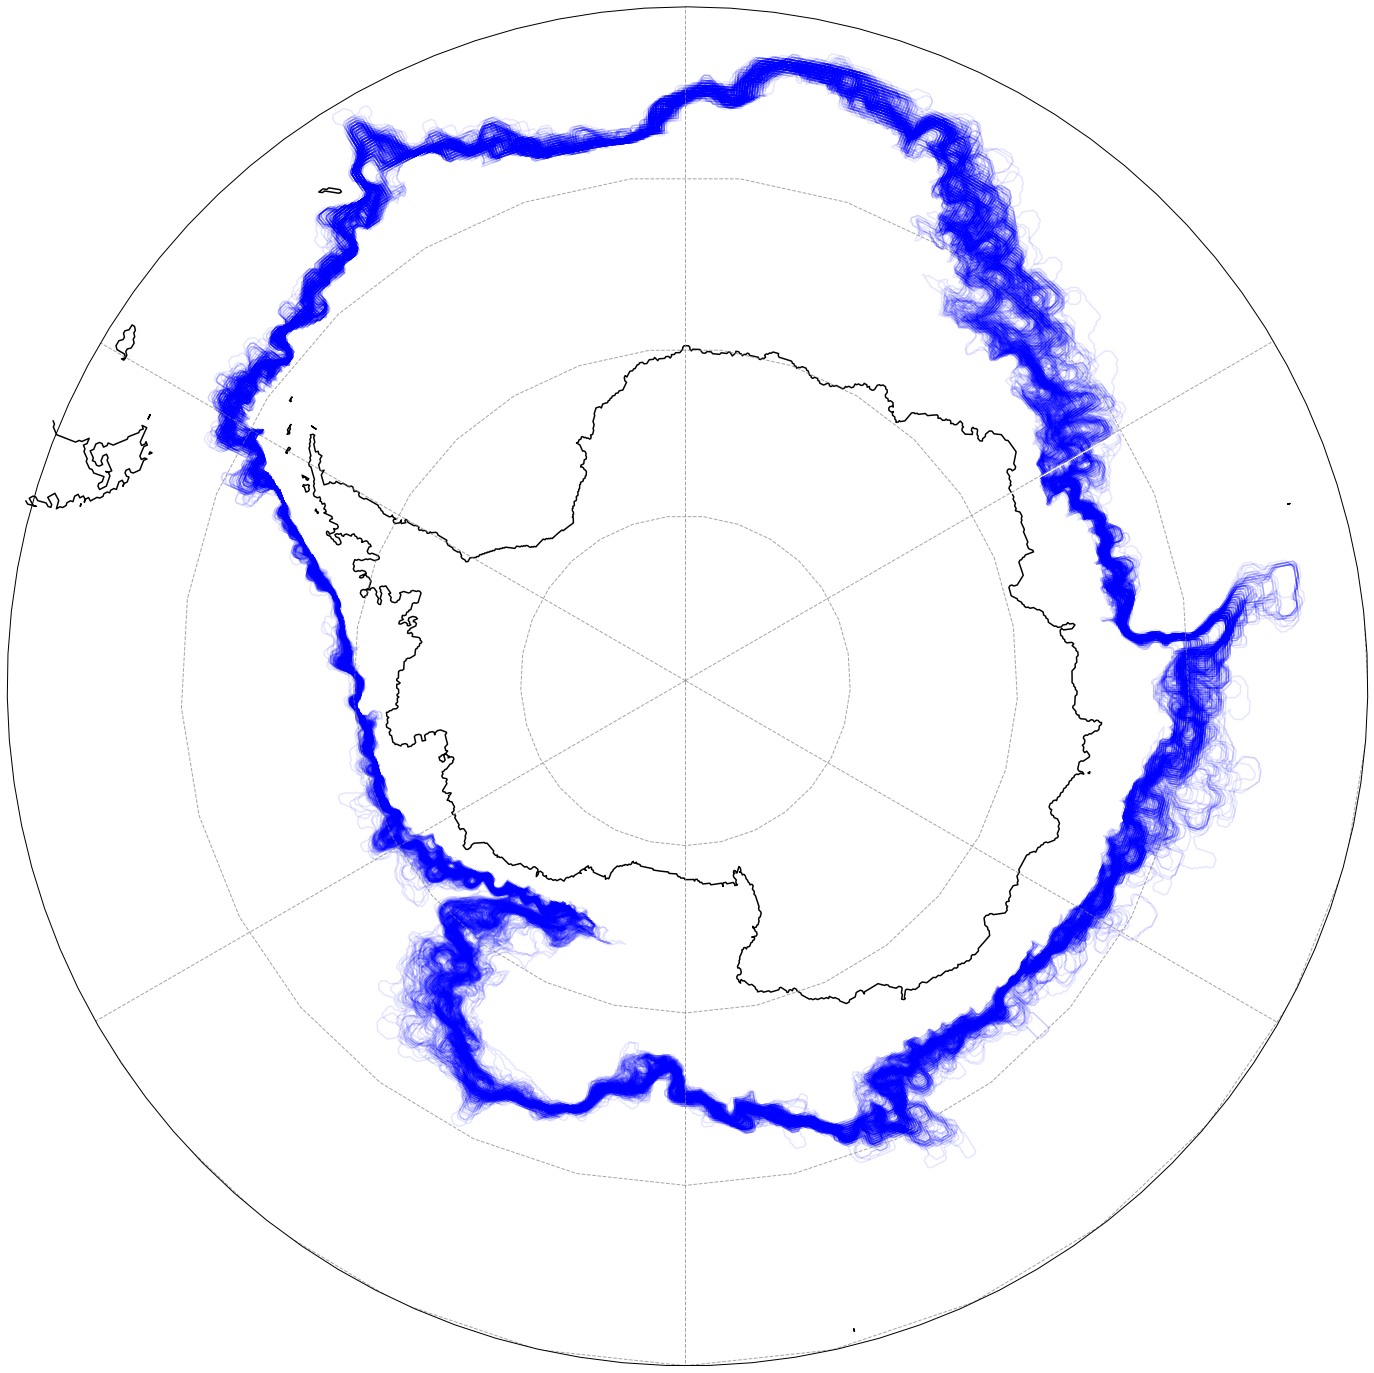

In [20]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
for i in range(365):
    ax.contour(ssh_mask_c1_daily2017.isel(time = i).xh, ssh_mask_c1_daily2017.isel(time = i).yh,ssh_mask_c1_daily2017.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1, transform = ccrs.PlateCarree())
plt.show()

### cycle2: annual, full time mean, satellite era mean, monthly climatology (full), monthly climatology (satellite), daily over one year (or shorter/longer?)

In [31]:
## cycle2, all years and time mean
ssh_annual_C2 = ssh_annual_C2.load()

In [34]:
# initate empty for masks
empty = np.empty((60,382,1440))
empty[:,:,:] = np.nan
ssh_mask_c2_annual = xr.DataArray(empty, coords = ssh_annual_C2.coords)
ssh_mask_c2_annual.attrs['long_name'] = 'Mask for the region south of the southernmost cicumpolar continuous ssh contour'
ssh_mask_c2_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# initate empty for numbers (in case later you want to do the index thing, might as well compute once)
empty = np.empty((60,382,1440))
empty[:,:,:] = np.nan
ssh_numbers_c2_annual = xr.DataArray(empty, coords = ssh_annual_C2.coords)
ssh_numbers_c2_annual.attrs['long_name'] = 'Numbered southernmost cicumpolar continuous ssh contour'
ssh_numbers_c2_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# intiate empty for ssh value at contour
empty = np.empty((60))
empty[:] = np.nan
ssh_contour_value = xr.DataArray(empty, coords = [ssh_annual_C2.time], dims = 'time')

In [35]:
range_min = np.round(ssh_annual_C2.isel(xh = 0).min(dim = 'yh').values, decimals = 3)

In [36]:
%%time
for y in range(60):
    print(y)
    test_range = np.arange(range_min[y]+0.002, -1.4, 0.001)
    contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_annual_C2.isel(time = y), test_range, lat_north = -29)
    ssh_mask_c2_annual[y,:,:] = contour_mask.values
    ssh_numbers_c2_annual[y,:,:] = contour_numbered.values
    ssh_contour_value[y] = contour_depth

0
Southernmost circumpolar continuous profile at ssh =  -1.603000036239633
last_index_i, last_index_j (array([1439]), array([174]))
1
Southernmost circumpolar continuous profile at ssh =  -1.6229999589920119
last_index_i, last_index_j (array([1439]), array([153]))
2
Southernmost circumpolar continuous profile at ssh =  -1.6180000381469826
last_index_i, last_index_j (array([1439]), array([157]))
3
Southernmost circumpolar continuous profile at ssh =  -1.6010000524520975
last_index_i, last_index_j (array([1439]), 157)
4
Southernmost circumpolar continuous profile at ssh =  -1.6119999961853126
last_index_i, last_index_j (array([1439]), array([155]))
5
Southernmost circumpolar continuous profile at ssh =  -1.6279999656677335
last_index_i, last_index_j (array([1439]), array([153]))
6
Southernmost circumpolar continuous profile at ssh =  -1.6179999589920124
last_index_i, last_index_j (array([1439]), array([153]))
7
Southernmost circumpolar continuous profile at ssh =  -1.6110000457763742
las

In [40]:
ssh_numbers_c2_annual = xr.DataArray(ssh_numbers_c2_annual, coords = {'time':ssh_numbers_c2_annual.time, 'yh':ssh_numbers_c2_annual.yh, 'xh':ssh_numbers_c2_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_numbers_c2_annual.attrs)
ssh_mask_c2_annual = xr.DataArray(ssh_mask_c2_annual, coords = {'time':ssh_mask_c2_annual.time, 'yh':ssh_mask_c2_annual.yh, 'xh':ssh_mask_c2_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_mask_c2_annual.attrs)
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c2_annual, 'contour_masked_south':ssh_mask_c2_annual})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1958-2017_annual_SCC-ssh_contour.nc')

In [36]:
# full time mean
ssh_mean_C2 = ssh_annual_C2.mean(dim = 'time').load()
range_min = np.round(ssh_mean_C2.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_mean_C2, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_mask.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
contour_mask.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1958-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.643000054359444
last_index_i, last_index_j (array([1439]), array([154]))


In [37]:
# satellite era time mean
ssh_satellite_mean_C2 = ssh_annual_C2.sel(time = slice('1993','2017')).mean(dim = 'time').load()
range_min = np.round(ssh_satellite_mean_C2.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_satellite_mean_C2, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_mask.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
contour_mask.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1993-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.6479999933242888
last_index_i, last_index_j (array([1439]), 155)


In [38]:
# reload annual and time mean data for cycle1
cycle2_ssh_annual = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1958-2017_annual_SCC-ssh_contour.nc')
cycle2_ssh_annual_mask = cycle2_ssh_annual.contour_masked_south
cycle2_ssh_mean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1958-2017_mean_SCC-ssh_contour.nc')
cycle2_ssh_mean_mask = cycle2_ssh_mean.contour_masked_south
cycle2_ssh_satmean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1993-2017_mean_SCC-ssh_contour.nc')
cycle2_ssh_satmean_mask = cycle2_ssh_satmean.contour_masked_south

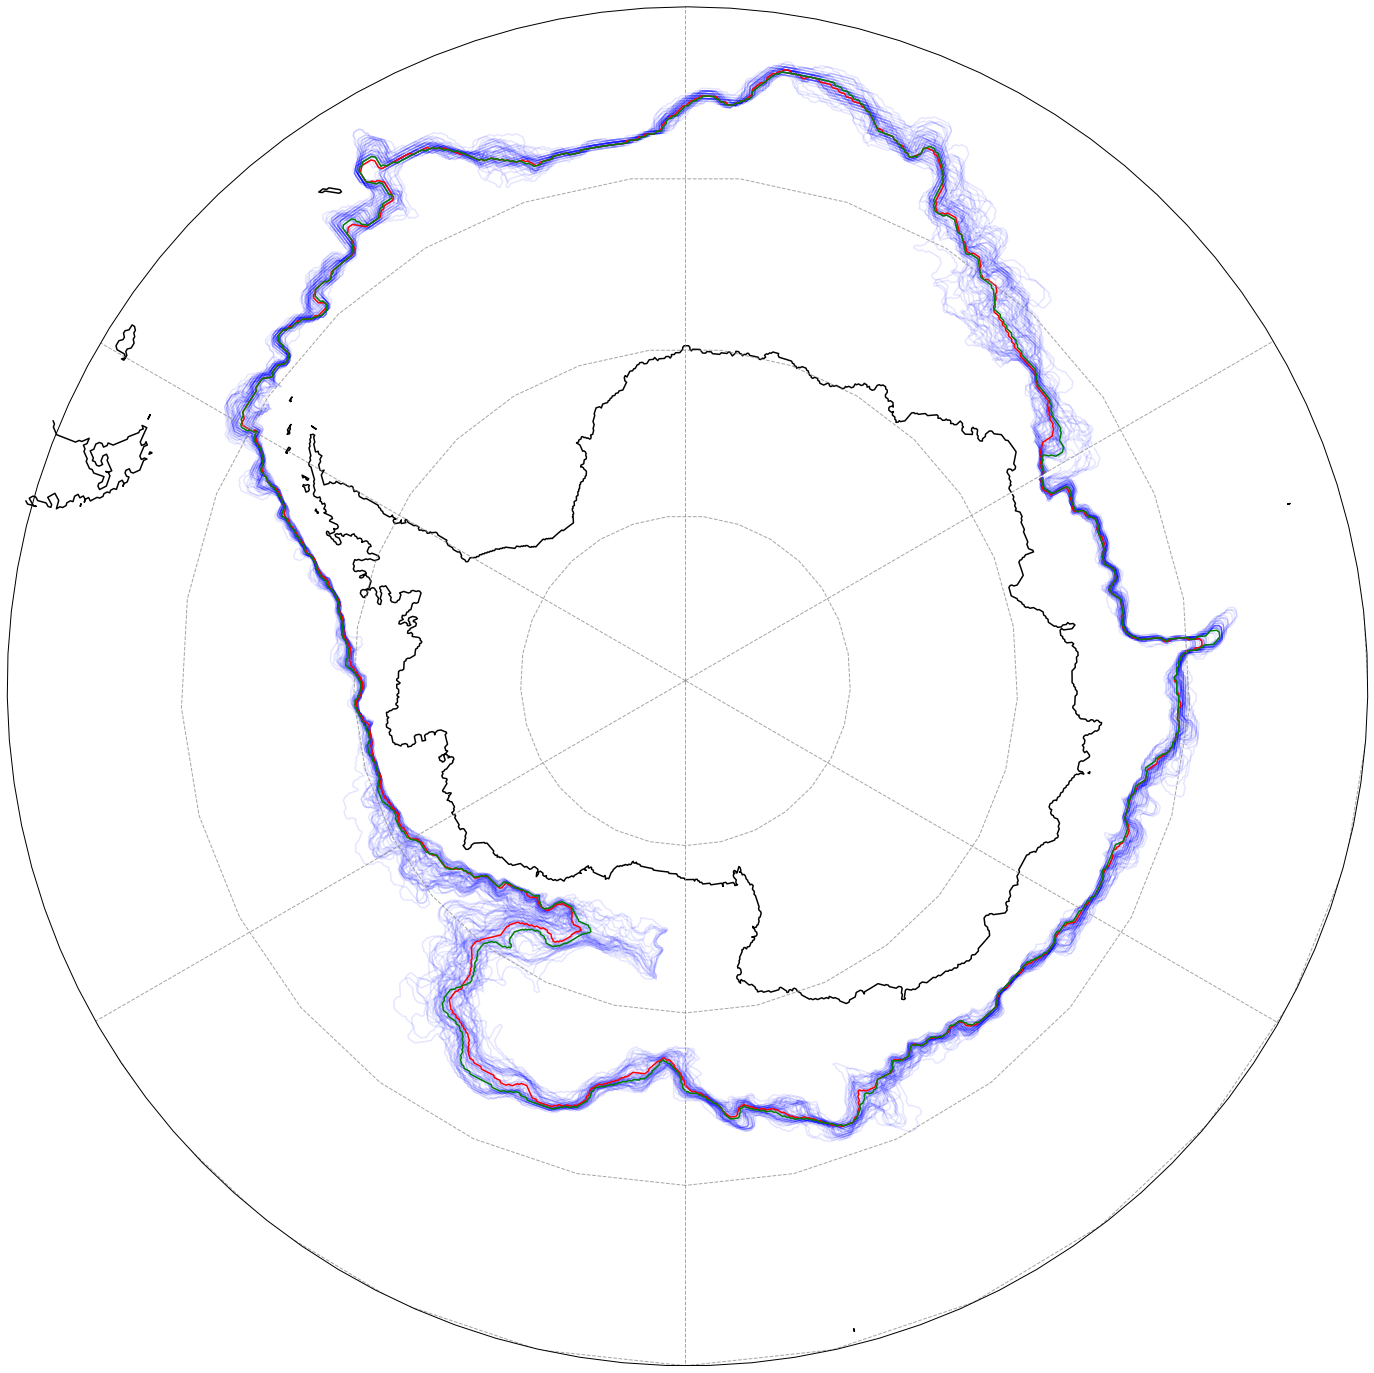

In [40]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
for i in range(60):
    ax.contour(cycle2_ssh_annual_mask.isel(time = i).xh, cycle2_ssh_annual_mask.isel(time = i).yh,cycle2_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1, transform = ccrs.PlateCarree())
ax.contour(cycle2_ssh_mean_mask.xh, cycle2_ssh_mean_mask.yh,cycle2_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1, transform = ccrs.PlateCarree())
ax.contour(cycle2_ssh_satmean_mask.xh, cycle2_ssh_satmean_mask.yh,cycle2_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1, transform = ccrs.PlateCarree())
plt.show()

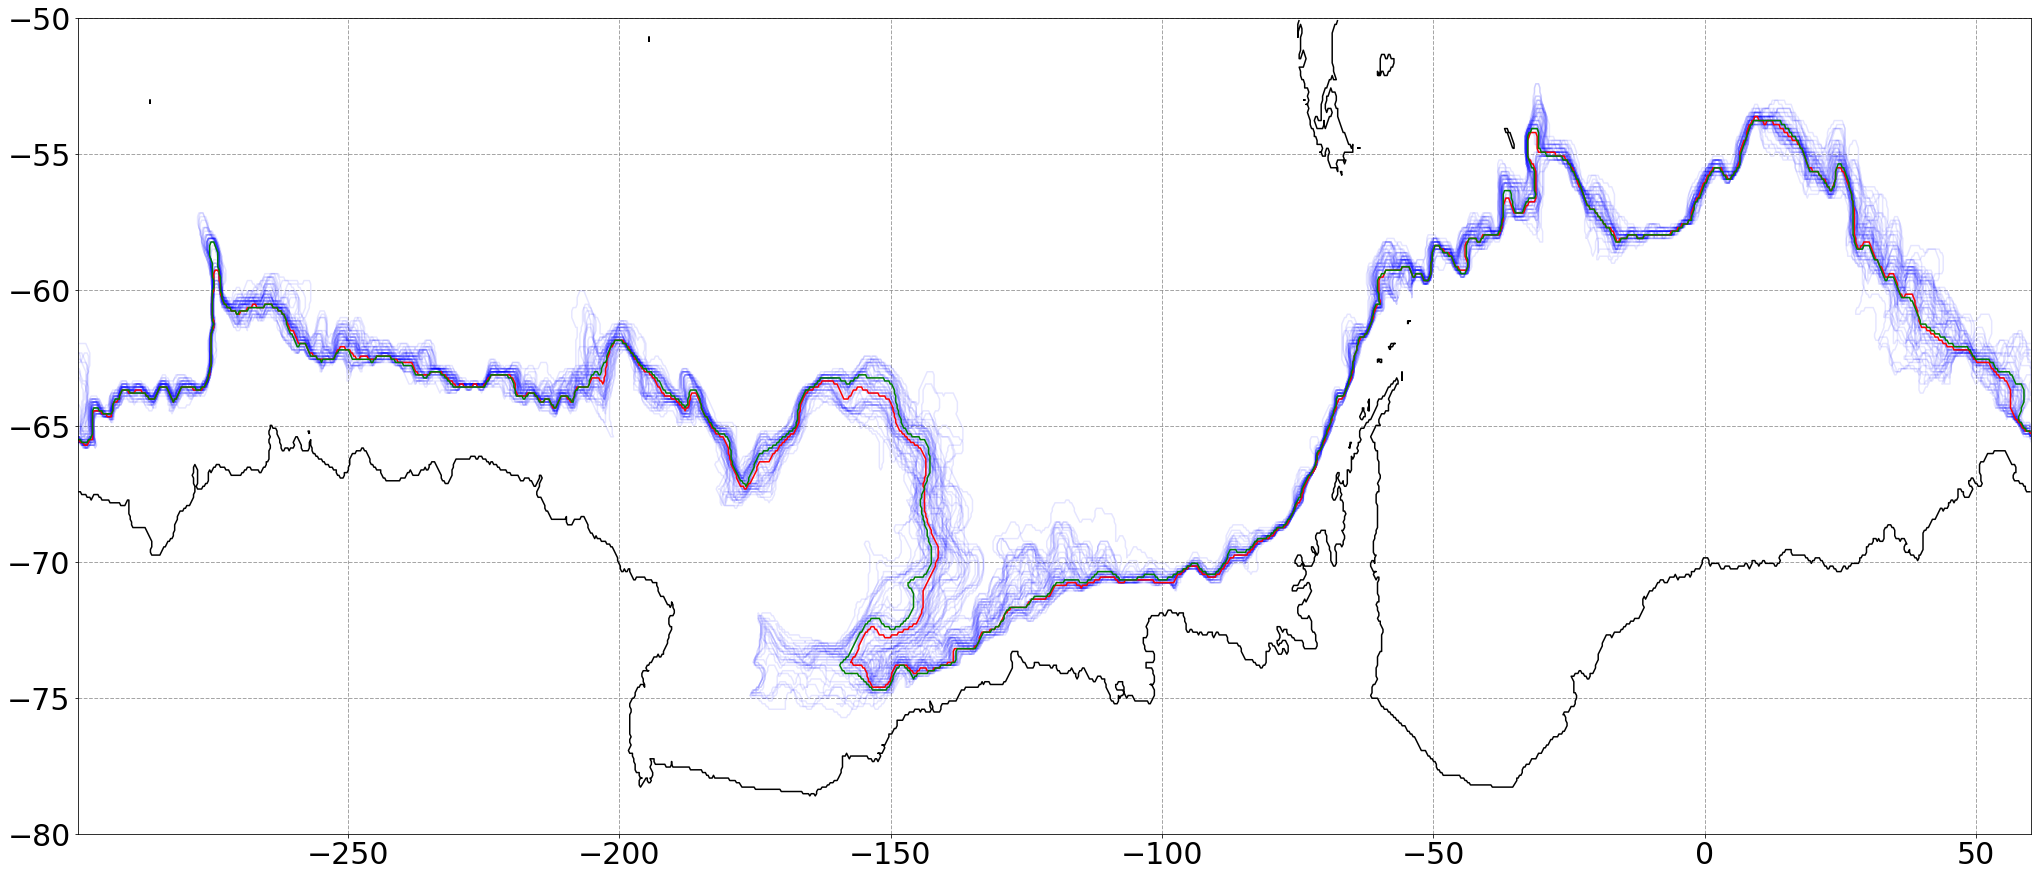

In [41]:
fig = plt.figure(figsize=[35, 15])
ax = plt.subplot()
lat_north = -50
ax.contour(land_mask.sel(yh = slice(-90,lat_north)).xh, land_mask.sel(yh = slice(-90,lat_north)).yh,land_mask.sel(yh = slice(-90,lat_north)),[0,1], colors = 'k', alpha = 1)
ax.set_yticks([-80,-75,-70,-65, -60,-55, -50], minor=False)
ax.grid(linewidth = 1, color = 'grey', linestyle = '--', alpha = 0.7)
for i in range(60):
    ax.contour(cycle2_ssh_annual_mask.isel(time = i).xh, cycle2_ssh_annual_mask.isel(time = i).yh,cycle2_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1)
ax.contour(cycle2_ssh_mean_mask.xh, cycle2_ssh_mean_mask.yh,cycle2_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1)
ax.contour(cycle2_ssh_satmean_mask.xh, cycle2_ssh_satmean_mask.yh,cycle2_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1)
ax.set_ylim([-80,lat_north])
plt.show()

### cycle3: annual, full time mean, satellite era mean, monthly climatology (full), monthly climatology (satellite), daily over one year (or shorter/longer?)

In [42]:
## cycle3, all years and time mean
ssh_annual_C3 = ssh_annual_C3.load()

In [51]:
# initate empty for masks
empty = np.empty((59,382,1440))
empty[:,:,:] = np.nan
ssh_mask_c3_annual = xr.DataArray(empty, coords = ssh_annual_C3.coords)
ssh_mask_c3_annual.attrs['long_name'] = 'Mask for the region south of the southernmost cicumpolar continuous ssh contour'
ssh_mask_c3_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# initate empty for numbers (in case later you want to do the index thing, might as well compute once)
empty = np.empty((59,382,1440))
empty[:,:,:] = np.nan
ssh_numbers_c3_annual = xr.DataArray(empty, coords = ssh_annual_C3.coords)
ssh_numbers_c3_annual.attrs['long_name'] = 'Numbered southernmost cicumpolar continuous ssh contour'
ssh_numbers_c3_annual.attrs['time_avg_info'] = 'annual mean ssh used'
# intiate empty for ssh value at contour
empty = np.empty((59))
empty[:] = np.nan
ssh_contour_value = xr.DataArray(empty, coords = [ssh_annual_C3.time], dims = 'time')

In [52]:
range_min = np.round(ssh_annual_C3.isel(xh = 0).min(dim = 'yh').values, decimals = 3)

In [53]:
%%time
for y in range(60):
    print(y)
    test_range = np.arange(range_min[y]+0.002, -1.4, 0.001)
    contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_annual_C3.isel(time = y), test_range, lat_north = -29)
    ssh_mask_c3_annual[y,:,:] = contour_mask.values
    ssh_numbers_c3_annual[y,:,:] = contour_numbered.values
    ssh_contour_value[y] = contour_depth

0
Southernmost circumpolar continuous profile at ssh =  -1.6489999704361022
last_index_i, last_index_j (array([1439]), array([151]))
1
Southernmost circumpolar continuous profile at ssh =  -1.6490000123977728
last_index_i, last_index_j (array([1439]), array([152]))
2
Southernmost circumpolar continuous profile at ssh =  -1.6380000543594446
last_index_i, last_index_j (array([1439]), array([153]))
3
Southernmost circumpolar continuous profile at ssh =  -1.6340000123977745
last_index_i, last_index_j (array([1439]), array([154]))
4
Southernmost circumpolar continuous profile at ssh =  -1.6370000238418674
last_index_i, last_index_j (array([1439]), array([155]))
5
Southernmost circumpolar continuous profile at ssh =  -1.6590000028610297
last_index_i, last_index_j (array([1439]), array([152]))
6
Southernmost circumpolar continuous profile at ssh =  -1.6370000381469805
last_index_i, last_index_j (array([1439]), array([153]))
7
Southernmost circumpolar continuous profile at ssh =  -1.6419999542

IndexError: index 59 is out of bounds for axis 0 with size 59

In [57]:
ssh_numbers_c3_annual = xr.DataArray(ssh_numbers_c3_annual, coords = {'time':ssh_numbers_c3_annual.time, 'yh':ssh_numbers_c3_annual.yh, 'xh':ssh_numbers_c3_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_numbers_c3_annual.attrs)
ssh_mask_c3_annual = xr.DataArray(ssh_mask_c3_annual, coords = {'time':ssh_mask_c3_annual.time, 'yh':ssh_mask_c3_annual.yh, 'xh':ssh_mask_c3_annual.xh, 'ssh_contour_value': ssh_contour_value}, attrs = ssh_mask_c3_annual.attrs)
ds = xr.Dataset({'contour_mask_numbered':ssh_numbers_c3_annual, 'contour_masked_south':ssh_mask_c3_annual})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1958-2017_annual_SCC-ssh_contour.nc')

In [43]:
# full time mean
ssh_mean_C3 = ssh_annual_C3.mean(dim = 'time').load()
range_min = np.round(ssh_mean_C3.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_mean_C3, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_mask.attrs['time_avg_info']  = '1958-2017 mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
contour_mask.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1958-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.6529999513626177
last_index_i, last_index_j (array([1439]), array([154]))


In [44]:
# satellite era time mean
ssh_satellite_mean_C3 = ssh_annual_C3.sel(time = slice('1993','2017')).mean(dim = 'time').load()
range_min = np.round(ssh_satellite_mean_C3.isel(xh = 0).min(dim = 'yh').values, decimals = 3)
test_range = np.arange(range_min+0.002, -1.4, 0.001)
contour_numbered, contour_mask, _, contour_depth = OM4_southernmost_continuous_ssh_contour(ssh_satellite_mean_C3, test_range, lat_north = -29)
contour_numbered.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_mask.attrs['time_avg_info']  = '1993-2017 satellite era mean ssh used'
contour_numbered.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
contour_mask.attrs['contour_ssh_value'] = str(contour_depth)[:6]+' m'
ds = xr.Dataset({'contour_mask_numbered':contour_numbered, 'contour_masked_south':contour_mask})
ds.to_netcdf('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1993-2017_mean_SCC-ssh_contour.nc')

Southernmost circumpolar continuous profile at ssh =  -1.6479999418258762
last_index_i, last_index_j (array([1439]), array([156]))


In [45]:
# reload annual and time mean data for cycle1
cycle3_ssh_annual = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1958-2017_annual_SCC-ssh_contour.nc')
cycle3_ssh_annual_mask = cycle3_ssh_annual.contour_masked_south
cycle3_ssh_mean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1958-2017_mean_SCC-ssh_contour.nc')
cycle3_ssh_mean_mask = cycle3_ssh_mean.contour_masked_south
cycle3_ssh_satmean = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1993-2017_mean_SCC-ssh_contour.nc')
cycle3_ssh_satmean_mask = cycle3_ssh_satmean.contour_masked_south

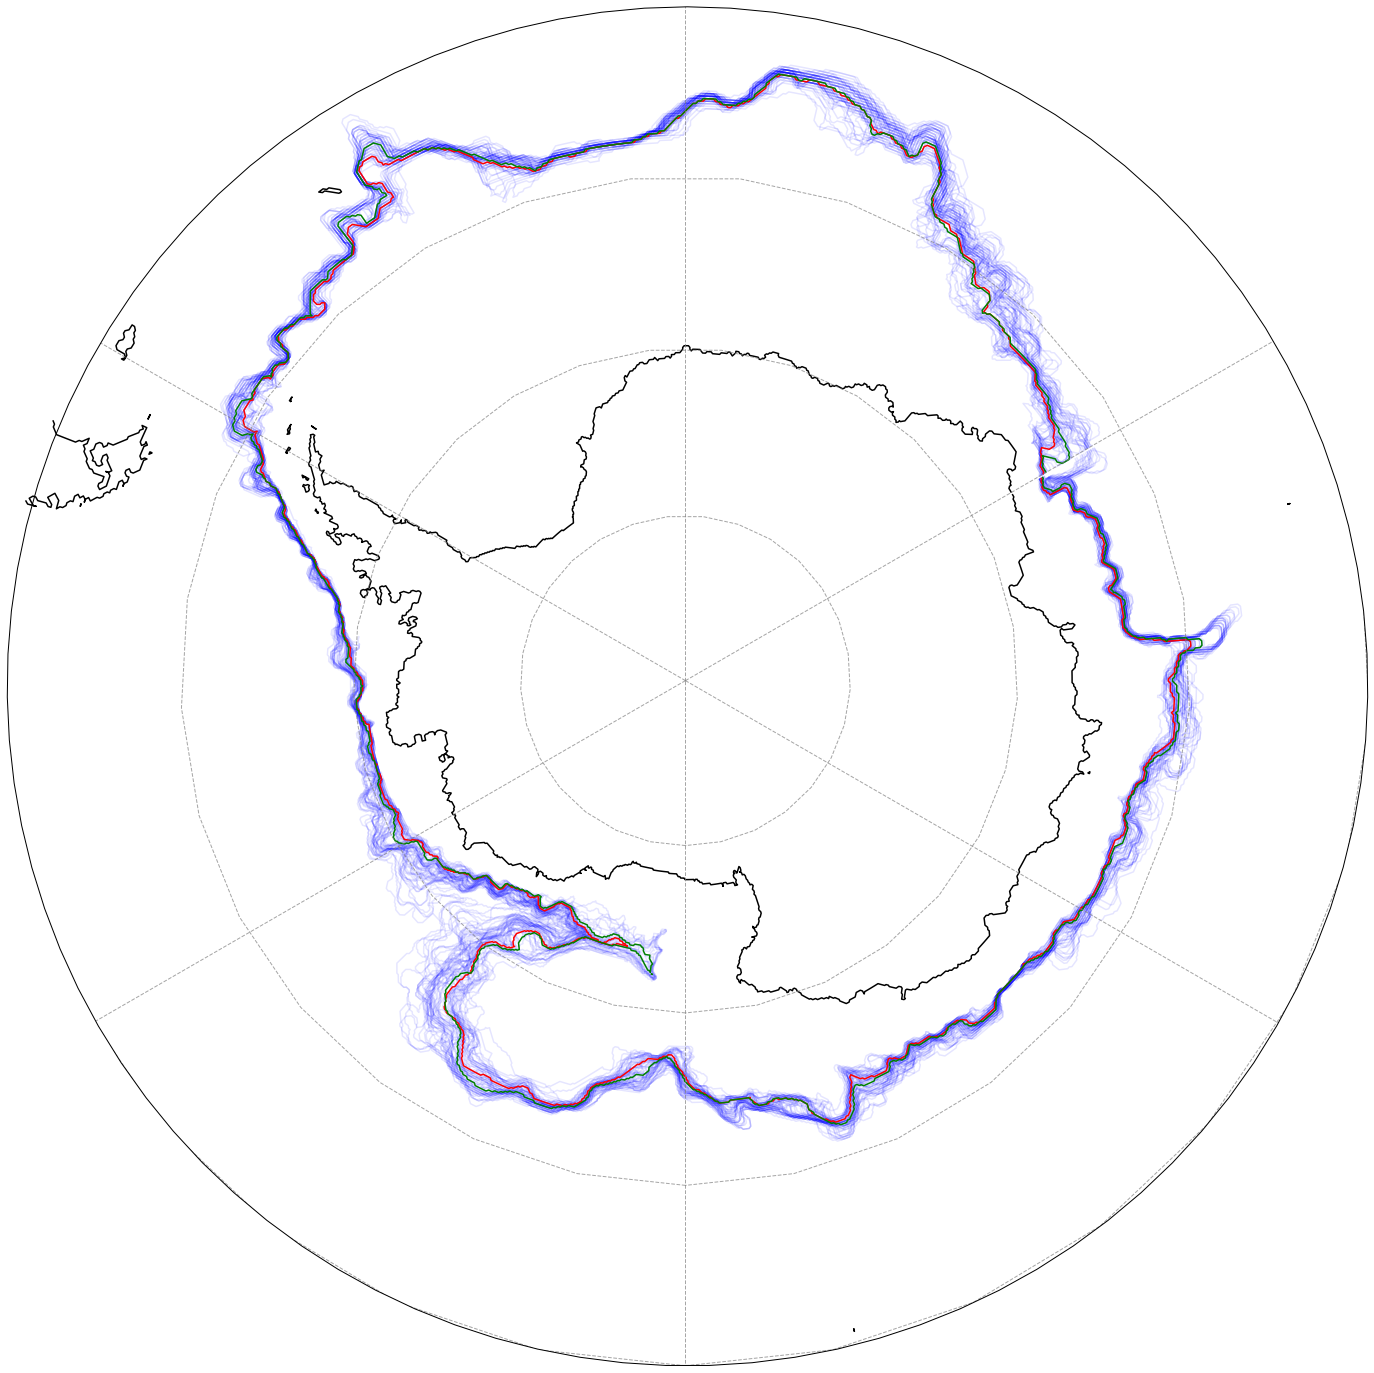

In [46]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
for i in range(59):
    ax.contour(cycle3_ssh_annual_mask.isel(time = i).xh, cycle3_ssh_annual_mask.isel(time = i).yh,cycle3_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1, transform = ccrs.PlateCarree())
ax.contour(cycle3_ssh_mean_mask.xh, cycle3_ssh_mean_mask.yh,cycle3_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1, transform = ccrs.PlateCarree())
ax.contour(cycle3_ssh_satmean_mask.xh, cycle3_ssh_satmean_mask.yh,cycle3_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1, transform = ccrs.PlateCarree())
plt.show()

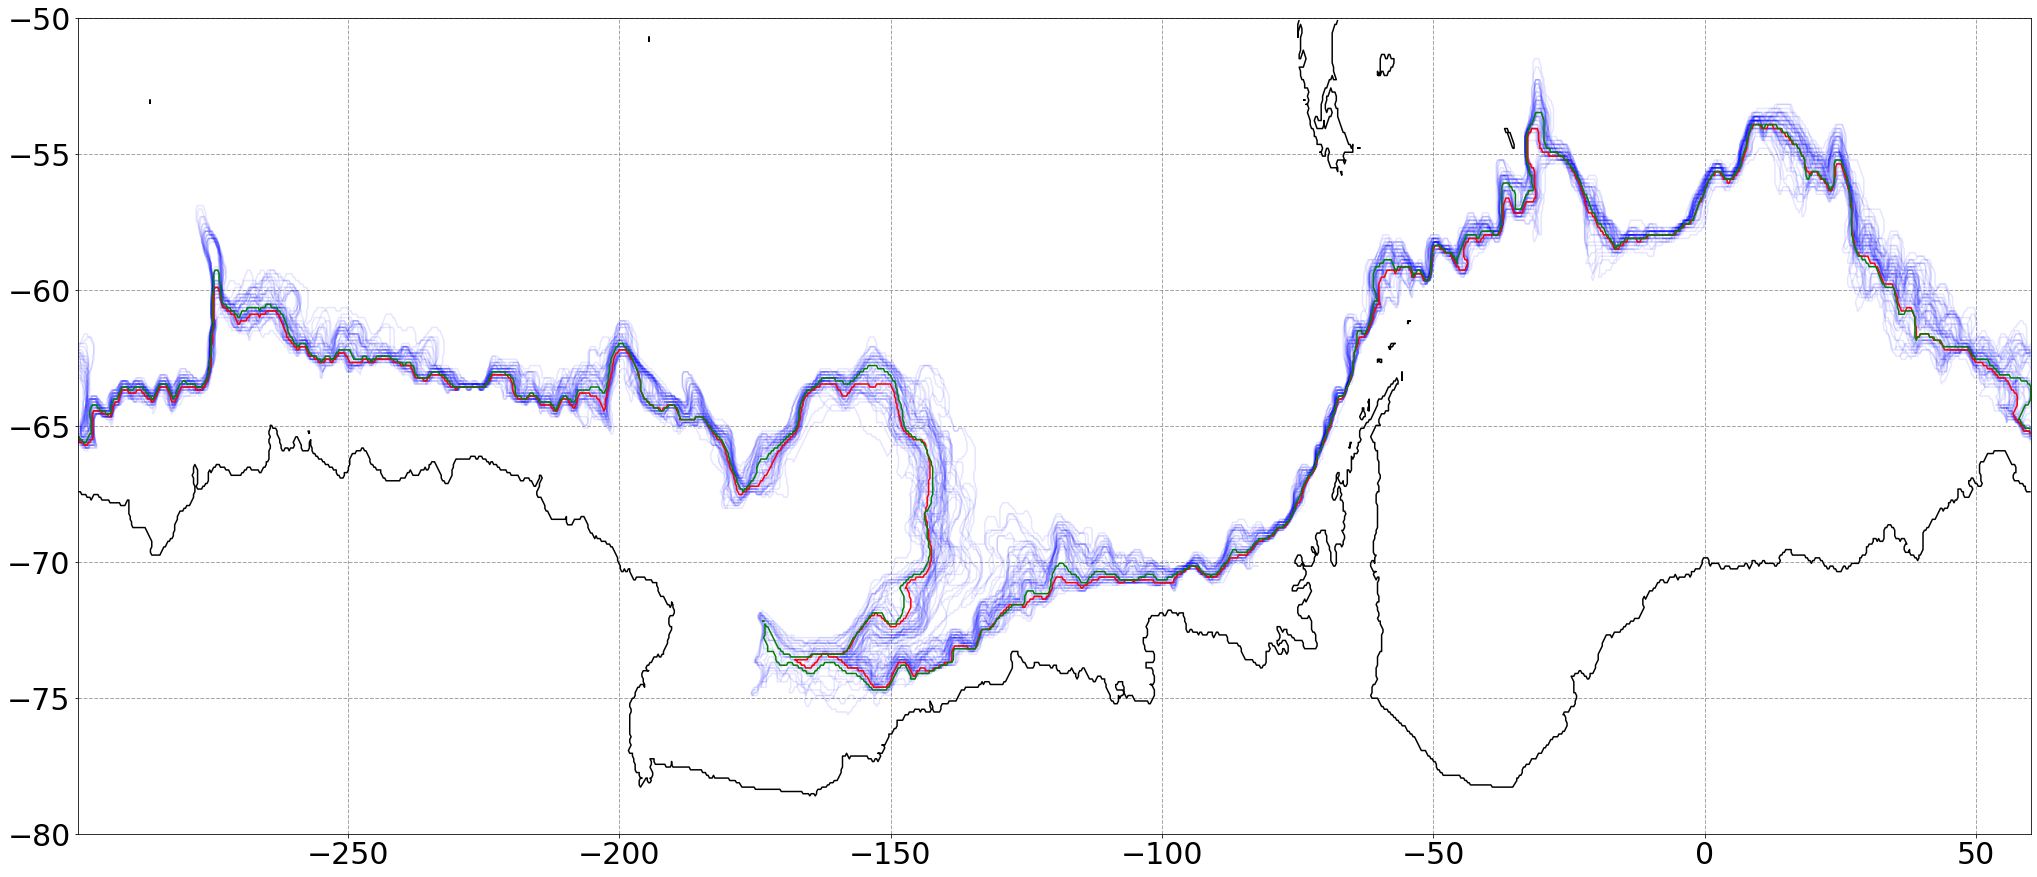

In [48]:
fig = plt.figure(figsize=[35, 15])
ax = plt.subplot()
lat_north = -50
ax.contour(land_mask.sel(yh = slice(-90,lat_north)).xh, land_mask.sel(yh = slice(-90,lat_north)).yh,land_mask.sel(yh = slice(-90,lat_north)),[0,1], colors = 'k', alpha = 1)
ax.set_yticks([-80,-75,-70,-65, -60,-55, -50], minor=False)
ax.grid(linewidth = 1, color = 'grey', linestyle = '--', alpha = 0.7)
for i in range(59):
    ax.contour(cycle3_ssh_annual_mask.isel(time = i).xh, cycle3_ssh_annual_mask.isel(time = i).yh,cycle3_ssh_annual_mask.isel(time = i).fillna(0), levels = [0,1], colors = 'b', alpha = 0.1)
ax.contour(cycle3_ssh_mean_mask.xh, cycle3_ssh_mean_mask.yh,cycle3_ssh_mean_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1)
ax.contour(cycle3_ssh_satmean_mask.xh, cycle3_ssh_satmean_mask.yh,cycle3_ssh_satmean_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1)
ax.set_ylim([-80,lat_north])
plt.show()

### satellite era mean - summary of 3 cycles

In [10]:
#cycles
C1_ssh_satellite = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle1_1993-2017_mean_SUC-ssh.nc')
C1_ssh_satellite_numbers = C1_ssh_satellite.contour_mask_numbered
C1_ssh_satellite_mask = C1_ssh_satellite.contour_masked_south
#
C2_ssh_satellite = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle2_1993-2017_mean_SUC-ssh.nc')
C2_ssh_satellite_numbers = C2_ssh_satellite.contour_mask_numbered
C2_ssh_satellite_mask = C2_ssh_satellite.contour_masked_south
#
C3_ssh_satellite = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r/cycle3_1993-2017_mean_SUC-ssh.nc')
C3_ssh_satellite_numbers = C3_ssh_satellite.contour_mask_numbered
C3_ssh_satellite_mask = C3_ssh_satellite.contour_masked_south

In [12]:
# obs
CMEMS_ssh_satellite = xr.open_dataset('/work/Ruth.Moorman/masks_and_contours/CMEMS-satellite-obs/CMEMS_1993-2017_mean_SUC-ssh.nc')
CMEMS_ssh_satellite_mask = CMEMS_ssh_satellite.contour_masked_south
CMEMS_ssh_satellite_numbers = CMEMS_ssh_satellite.contour_mask_numbered

In [13]:
f = static.Coriolis.sel(yq = slice(-90,lat_north))
# bathymetry is defined on the tracer (h) grid whilst f is defined on the vorticity (q) grid, interpolate bathymetry to the q grid
yh = bathy.yh.values
xh = bathy.xh.values
f_q = f.interp(xq = xh, yq = yh) 
f_q = f_q.rename({'yq':'yh','xq':'xh'})
# compute static (neglect nu) f/H 
fH_static = f_q/bathy

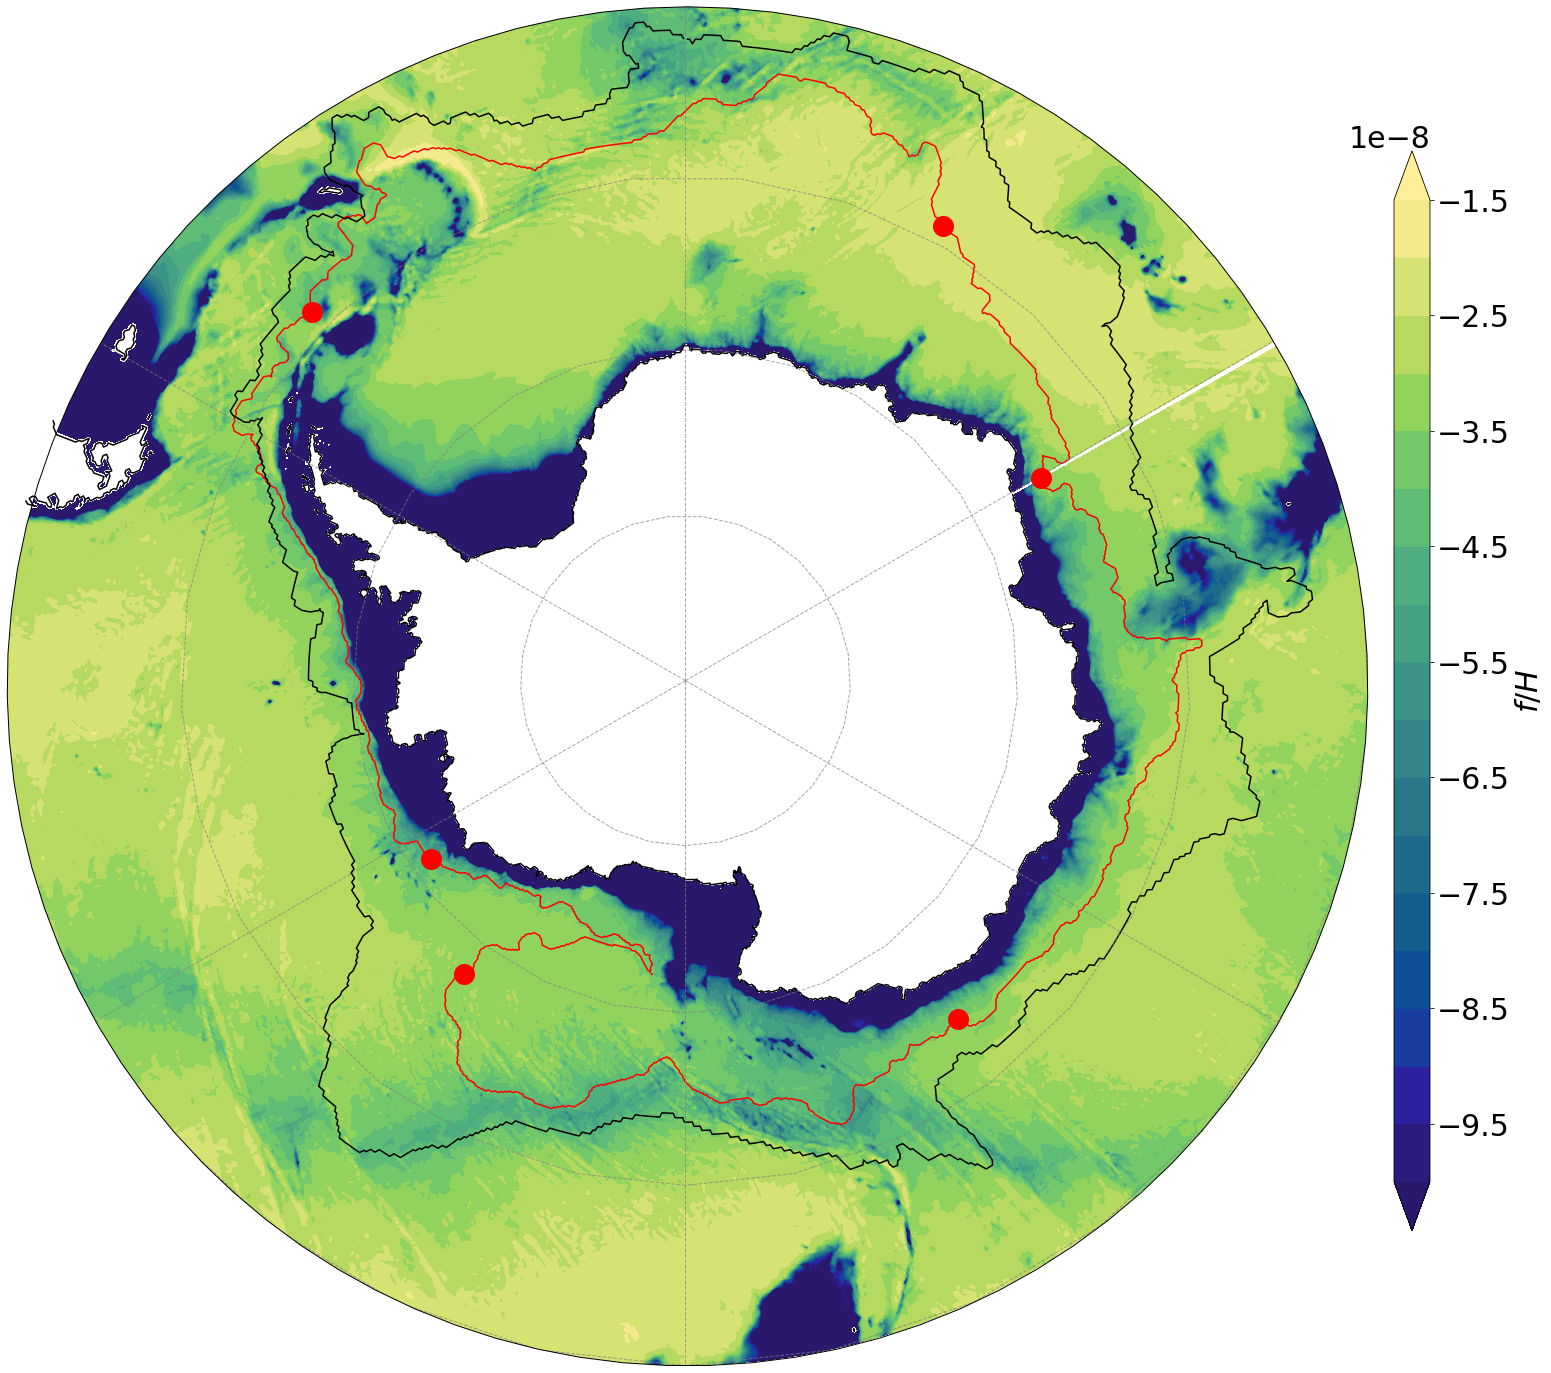

In [26]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
levels = np.arange(-1.0e-7, -1.1e-8, 0.5e-8)
fH = ax.contourf(fH_static.sel(yh = slice(-90,lat_north)).xh, fH_static.sel(yh = slice(-90,lat_north)).yh, fH_static.sel(yh = slice(-90,lat_north)).values, cmap = cm.haline, levels = levels, extend = 'both',transform = ccrs.PlateCarree())

# ax.contour(C1_ssh_satellite_mask.xh, C1_ssh_satellite_mask.yh,C1_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'b', alpha = 1, transform = ccrs.PlateCarree())
# ax.contour(C2_ssh_satellite_mask.xh, C2_ssh_satellite_mask.yh,C2_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1, transform = ccrs.PlateCarree())
ax.contour(C3_ssh_satellite_mask.xh, C3_ssh_satellite_mask.yh,C3_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1, transform = ccrs.PlateCarree())
ax.contour(CMEMS_ssh_satellite_mask.longitude, CMEMS_ssh_satellite_mask.latitude,CMEMS_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'k', alpha = 1, transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 0).values, lat_contour3.isel(contour_index = 0).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 500).values, lat_contour3.isel(contour_index = 500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 1000).values, lat_contour3.isel(contour_index = 1000).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 1500).values, lat_contour3.isel(contour_index = 1500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 2000).values, lat_contour3.isel(contour_index = 2000).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour3.isel(contour_index = 2500).values, lat_contour3.isel(contour_index = 2500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())

cax = fig.add_axes([0.905, 0.2, 0.02, 0.6])
cbar=plt.colorbar(fH,cax = cax,orientation='vertical',shrink = 0.5)
cax.set_ylabel('$f/H$', fontsize = 30)

plt.show()

In [15]:
def extract_contour_index_xh_yh(contour_mask_numbered):
    contour_mask_numbered_1D = contour_mask_numbered.stack(contour_position = ['yh','xh'])
    contour_mask_numbered_1D = contour_mask_numbered_1D.where(contour_mask_numbered_1D>0, drop = True)
    contour_index = contour_mask_numbered_1D.sortby(contour_mask_numbered_1D)
    lat_along_contour = xr.DataArray(contour_index.yh, coords = [contour_index.values], dims = 'contour_index')
    lon_along_contour = xr.DataArray(contour_index.xh, coords = [contour_index.values], dims = 'contour_index')
    contour_index = xr.DataArray(contour_index, coords = [contour_index.values], dims = 'contour_index')
    contour_index = xr.DataArray(contour_index, coords = {'contour_index':contour_index, 'yh': lat_along_contour, 'xh': lon_along_contour} )
    return contour_index

In [16]:
def variable_on_contour_index(variable, contour_mask_numbered):
    contour_mask_numbered_1D = contour_mask_numbered.stack(contour_position = ['yh','xh'])
    contour_mask_numbered_1D = contour_mask_numbered_1D.where(contour_mask_numbered_1D>0, drop = True)
    contour_index = contour_mask_numbered_1D.sortby(contour_mask_numbered_1D)
    
    var_masked = variable * (contour_mask_numbered.where(contour_mask_numbered>0)*0+1)
    var_masked_1D = var_masked.stack(contour_position = ['yh','xh'])
    var_masked_1D = var_masked_1D.where(np.abs(var_masked_1D)>0, drop = True)
    var_contour = var_masked_1D.sortby(contour_index)
    
    lat_along_contour = xr.DataArray(contour_index.yh, coords = [contour_index.values], dims = 'contour_index')
    lon_along_contour = xr.DataArray(contour_index.xh, coords = [contour_index.values], dims = 'contour_index')
    contour_index = xr.DataArray(contour_index[1:], coords = [contour_index.values[1:]], dims = 'contour_index')
    var_contour = xr.DataArray(var_contour.values, coords = [contour_index.values], dims = 'contour_index')
    
    var_contour = xr.DataArray(var_contour, coords = {'contour_index':contour_index, 'yh': lat_along_contour[1:], 'xh': lon_along_contour[1:]} )
    return var_contour, lat_along_contour, lon_along_contour

In [17]:
fH_C1_ssh_contour, lat_contour1, lon_contour1 = variable_on_contour_index(fH_static, C1_ssh_satellite_numbers)
fH_C2_ssh_contour, lat_contour2, lon_contour2 = variable_on_contour_index(fH_static, C2_ssh_satellite_numbers)
fH_C3_ssh_contour, lat_contour3, lon_contour3 = variable_on_contour_index(fH_static, C3_ssh_satellite_numbers)


In [ ]:
fH_obs_ssh_contour, lat_contour, lon_contour = variable_on_contour_index(fH_static, C3_ssh_satellite_numbers)


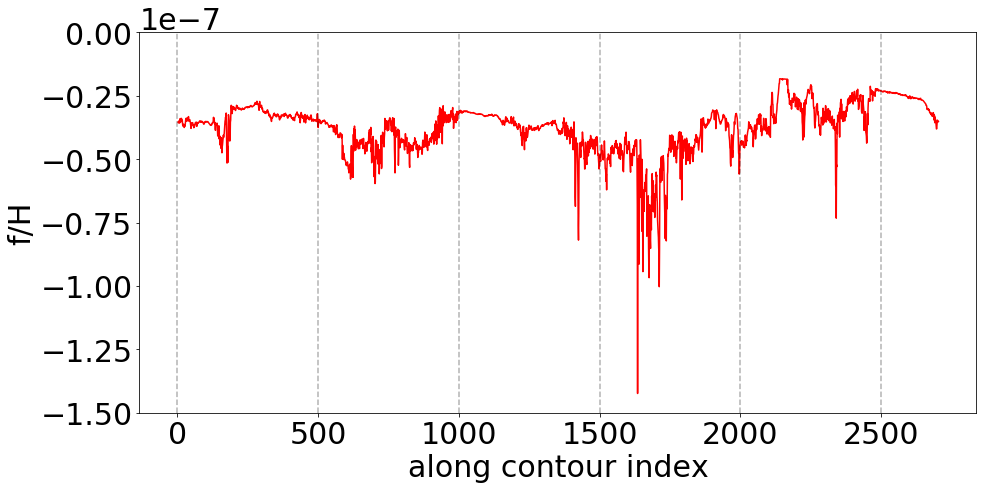

In [24]:
plt.figure(figsize = (15,7))
ax = plt.subplot()
# ax.plot(fH_C1_ssh_contour.contour_index, fH_C1_ssh_contour.values, 'ko', markersize = 1)
# ax.plot(fH_C2_ssh_contour.contour_index, fH_C2_ssh_contour.values, 'bo', markersize = 1)
ax.plot(fH_C3_ssh_contour.contour_index, fH_C3_ssh_contour.values, 'r-', markersize = 1)
ax.plot([0,0],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.plot([500,500],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.plot([1000,1000],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.plot([1500,1500],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.plot([2000,2000],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.plot([2500,2500],[-1.5e-7,0], 'k--',alpha = 0.3)
ax.set_ylim([-1.5e-7,0])
ax.set_ylabel('f/H')
ax.set_xlabel('along contour index')
plt.show()

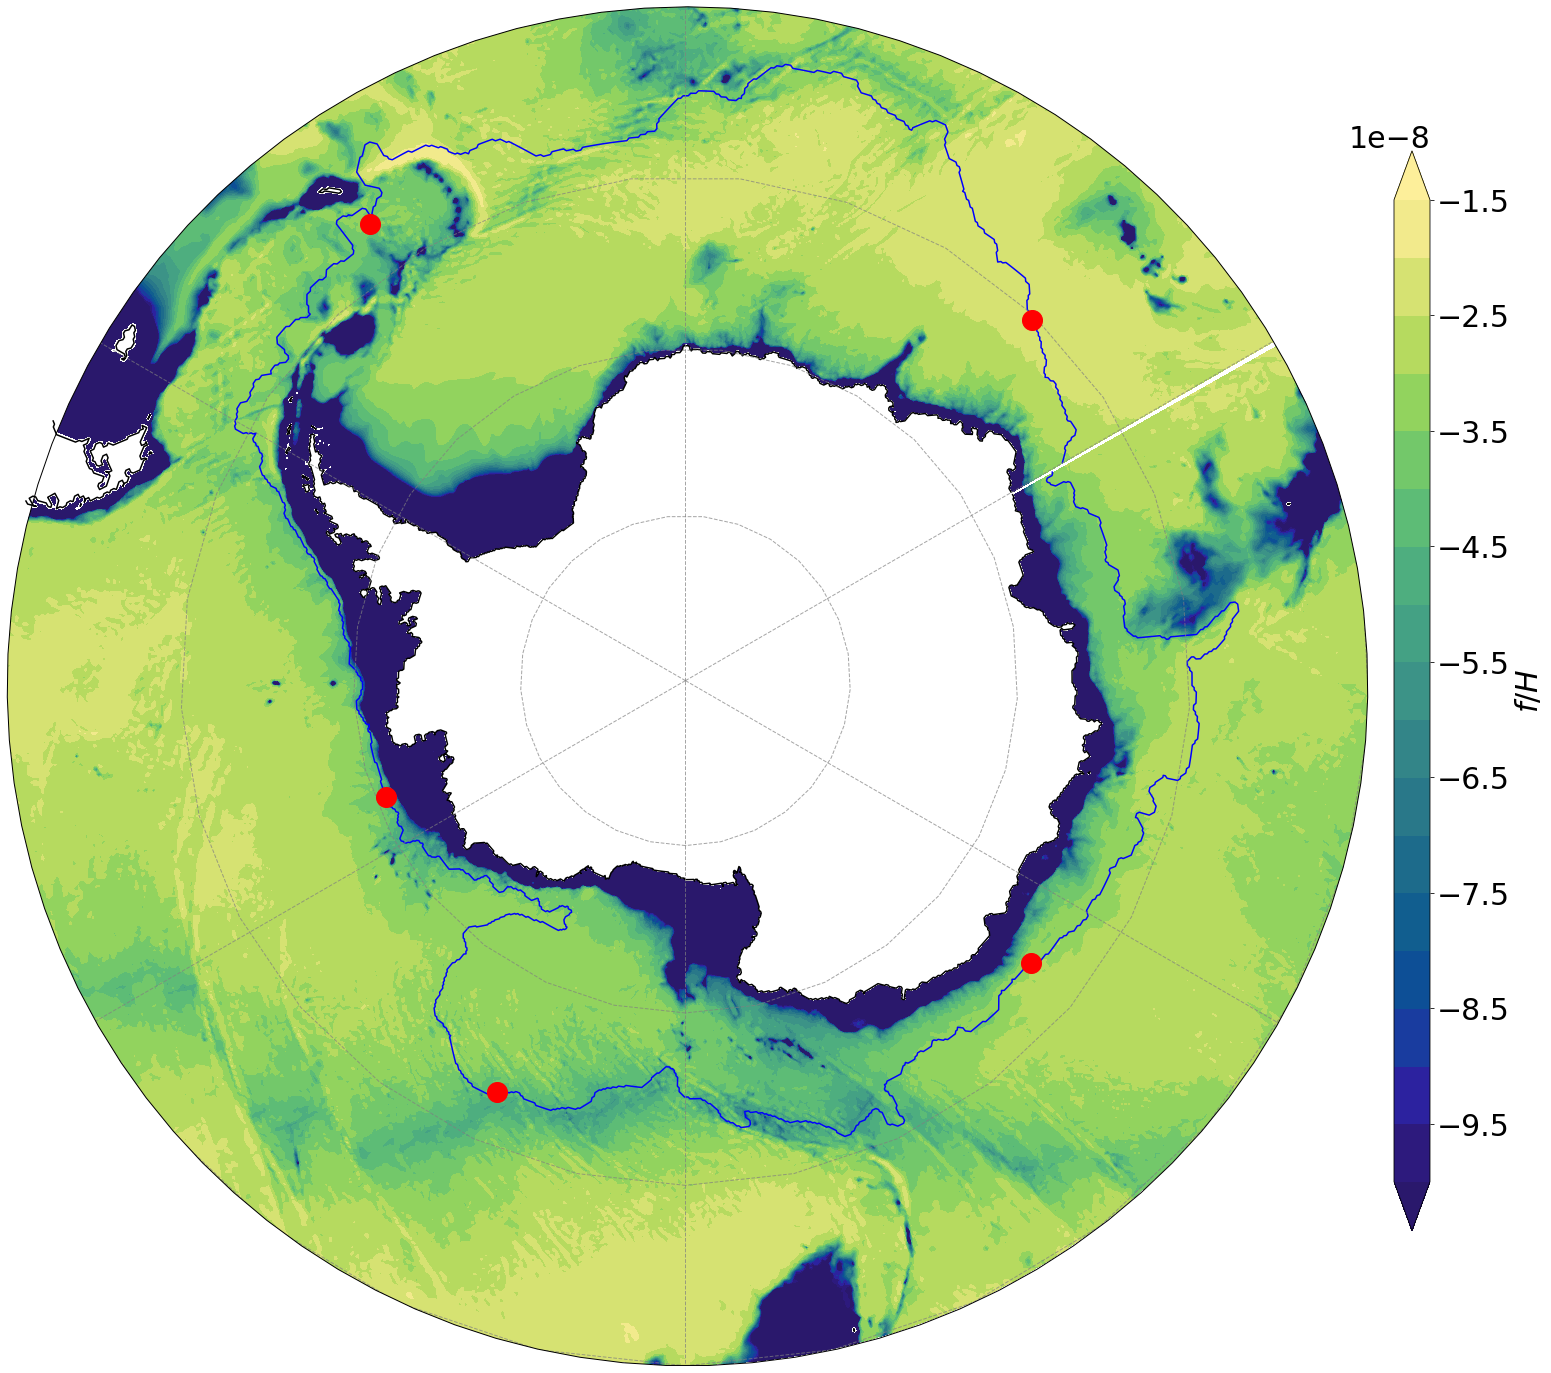

In [75]:
fig = plt.figure(figsize=[25, 25])
proj = ccrs.Stereographic(central_longitude=0,central_latitude=-90)
ax = plt.subplot(projection = proj)
lat_north = -50
so_basics(ax,land_mask,lat_north = -50)
levels = np.arange(-1.0e-7, -1.1e-8, 0.5e-8)
fH = ax.contourf(fH_static.sel(yh = slice(-90,lat_north)).xh, fH_static.sel(yh = slice(-90,lat_north)).yh, fH_static.sel(yh = slice(-90,lat_north)).values, cmap = cm.haline, levels = levels, extend = 'both',transform = ccrs.PlateCarree())

ax.contour(C1_ssh_satellite_mask.xh, C1_ssh_satellite_mask.yh,C1_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'b', alpha = 1, transform = ccrs.PlateCarree())
# ax.contour(C2_ssh_satellite_mask.xh, C2_ssh_satellite_mask.yh,C2_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'g', alpha = 1, transform = ccrs.PlateCarree())
# ax.contour(C3_ssh_satellite_mask.xh, C3_ssh_satellite_mask.yh,C3_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'r', alpha = 1, transform = ccrs.PlateCarree())
# ax.contour(CMEMS_ssh_satellite_mask.longitude, CMEMS_ssh_satellite_mask.latitude,CMEMS_ssh_satellite_mask.fillna(0), levels = [0,1], colors = 'k', alpha = 1, transform = ccrs.PlateCarree())
ax.plot(lon_contour.isel(contour_index = 500).values, lat_contour.isel(contour_index = 500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour.isel(contour_index = 1000).values, lat_contour.isel(contour_index = 1000).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour.isel(contour_index = 1500).values, lat_contour.isel(contour_index = 1500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour.isel(contour_index = 2000).values, lat_contour.isel(contour_index = 2000).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
ax.plot(lon_contour.isel(contour_index = 2500).values, lat_contour.isel(contour_index = 2500).values, 'ro', markersize = 20,  transform = ccrs.PlateCarree())
cax = fig.add_axes([0.905, 0.2, 0.02, 0.6])
cbar=plt.colorbar(fH,cax = cax,orientation='vertical',shrink = 0.5)
cax.set_ylabel('$f/H$', fontsize = 30)

plt.show()